**Préparation de l'environnement et importation des packages**

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve,roc_auc_score,precision_recall_curve, auc, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bank-additional-full.csv',sep=";")
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

**Dimension du dataFrame**

In [3]:
data.shape

(41188, 21)

In [4]:
data.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [5]:
data.describe(include=object).T

count unique                top   freq
job          41188     12             admin.  10422
marital      41188      4            married  24928
education    41188      8  university.degree  12168
default      41188      3                 no  32588
housing      41188      3                yes  21576
loan         41188      3                 no  33950
contact      41188      2           cellular  26144
month        41188     10                may  13769
day_of_week  41188      5                thu   8623
poutcome     41188      3        nonexistent  35563
y            41188      2                 no  36548

Affichage des informations relatives aux caractéristiques du dataset telles que : le nombre de modalité , la modalité dont l'effectif le plus élevé 

**Vérification de la présence des valeurs manquantes** 

In [6]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
data.isnull().values.any()

False

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Informations plus détaillées sur les caracteristiques**

---



In [9]:
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
_________________________________________________________________
marital : ['married' 'single' 'divorced' 'unknown']
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
_________________________________________________________________
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y         

In [10]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

Nous avons met les 3 caracteristiques dans une seule variable applée basic

**Le nombre de lignes duplicats**

In [11]:
data.duplicated().sum()

15

Suppression les déplicats

In [12]:
data= data.drop_duplicates()

In [13]:
new_column_names = data.columns

data.columns = new_column_names.str.replace('.','_')

data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married        basic       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married        basic       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp_var_rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

**Visualisation du réequilibrage des classes**

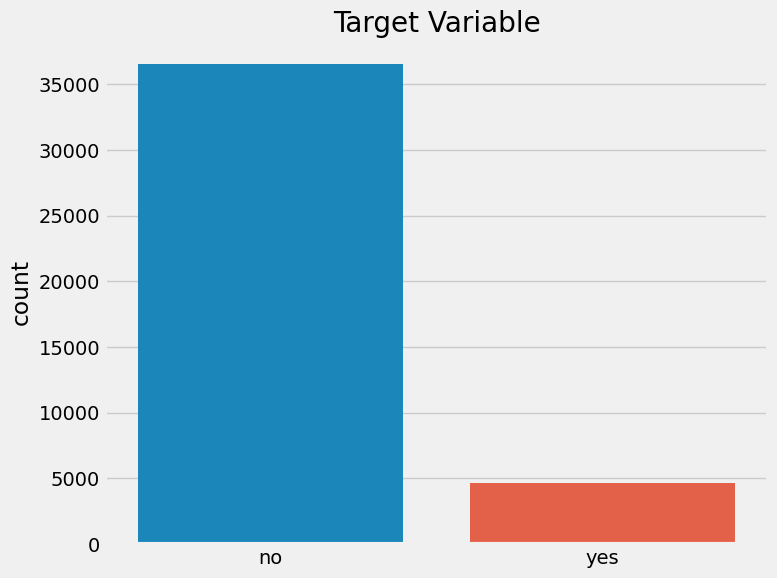

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

sns.countplot(data = data, x = 'y')

plt.xlabel('')
plt.title('Target Variable')
plt.tight_layout();
plt.show()

Nous pouvons clairement voir que les valeurs de la variable de résultat y sont biaisées vers le "non" car nous avons le nombre de "non" presque 8 fois plus que le nombre de "oui".

**Visualisation de la variable age en fonction de churn**

<Figure size 1000x1200 with 0 Axes>

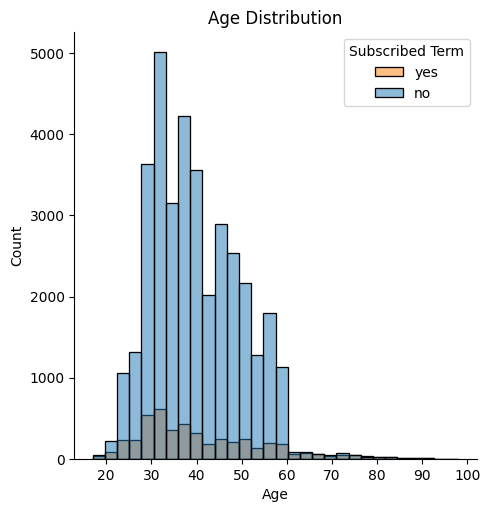

In [15]:
plt.figure(figsize = (10, 12))
plt.style.use('default')
g = sns.displot(data=data, x='age', hue='y', bins=30, kde = False, legend=False)

plt.title('Age Distribution')
plt.xlabel('Age')

plt.legend(title='Subscribed Term', loc='upper right', labels=['yes', 'no'])
plt.show()

La répartition par âge entre les non et les oui est très similaire

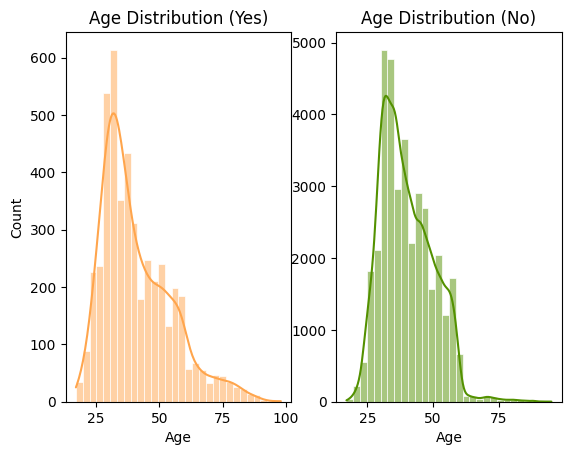

In [16]:
fig, axes = plt.subplots(1, 2)
plt.style.use('default')

#define figure size
sns.set(rc={"figure.figsize":(8, 4)})
 
sns.histplot(data.loc[data['y']=='yes']['age'], bins=30, kde = True,color='#ffa54c' , ax=axes[0])
axes[0].set_xlabel("Age", fontsize = 10)
axes[0].set_title('Age Distribution (Yes)')

sns.histplot(data.loc[data['y']=='no']['age'], bins=30, kde = True, color='#539100', ax=axes[1])
axes[1].set_xlabel("Age", fontsize = 10)
axes[1].set_ylabel('')
axes[1].set_title('Age Distribution (No)')
plt.show();

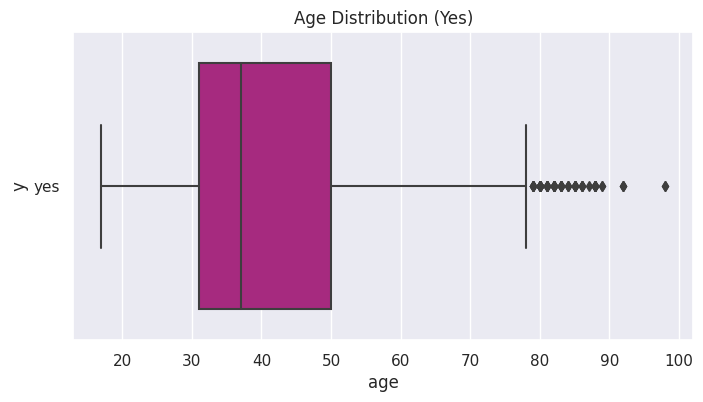

In [17]:
yes_data = data.loc[data['y']=='yes']

sns.set_style('darkgrid')
g = sns.boxplot(data=yes_data,y='y',x='age',orient = 'h', color = '#bb1587')
g.set_title('Age Distribution (Yes)')

plt.show(g);

La majorité des clients qui ont souscrit un dépôt de prêt ont entre 30 et 50 ans, ce qui correspond également à l'âge des revenus privilégiés.

In [18]:
educ_dict_mapping = {'basic.4y': 'Basic 4year',
                     'high.school': 'High School',
                     'basic.6y': 'Basic 6year',
                     'basic.9y': 'Basic 9year',
                     'professional.course':'Professional Course',
                     'unknown': 'Unknown',
                     'university.degree':'University Degree',
                     'illiterate':'Illiterate'}

data['education'] = data['education'].replace(educ_dict_mapping)

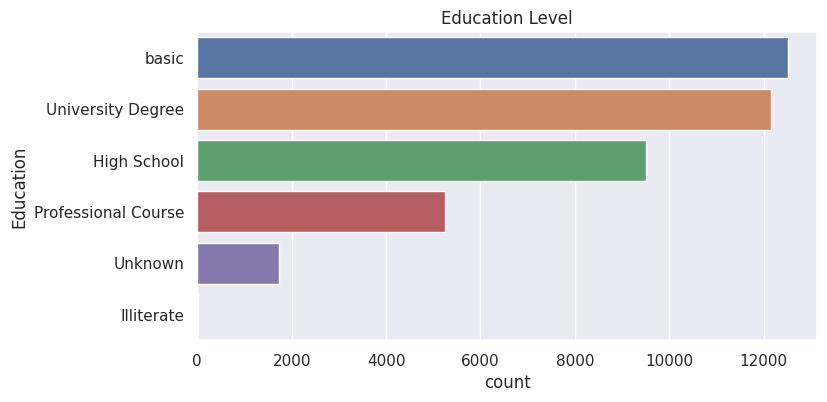

In [19]:
sns.countplot(data = data, y = 'education', order = data['education'].value_counts().index)
plt.ylabel('Education')
plt.title('Education Level')
plt.show()

Ce graphique montre que plus on est scolarisé, plus on peut obtenir tôt un acompte de prêt souscrit. Cela est probablement dû à un certain nombre de choses, au niveau de revenu, au montant de l'épargne, etc. Explorons également la répartition de chaque catégorie d'éducation de ceux qui obtiennent un prêt.

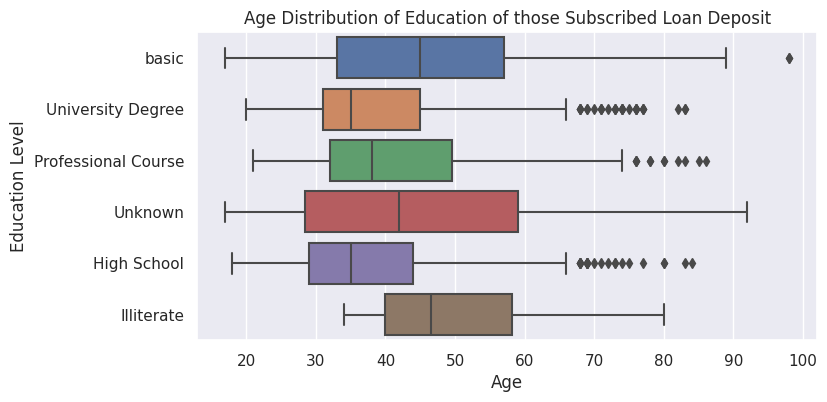

In [20]:
yes_data = data.loc[data['y']=='yes']

sns.set_style('darkgrid')
g = sns.boxplot(data=yes_data,y='education',x='age',orient = 'h')

g.set_xlabel('Age')
g.set_ylabel('Education Level')
g.set_title('Age Distribution of Education of those Subscribed Loan Deposit')

plt.show(g);

In [21]:
yes_data['education'].value_counts(normalize=True).sort_values(ascending=False)
education_percentages = (yes_data['education'].value_counts(normalize=True).rename('percentage').mul(100)
                     .reset_index()
                     .sort_values('percentage', ascending=False))

# Rename the Index field to Education Level
education_percentages.rename(columns={'index':'education_level'}, inplace=True)

# Print out the results before plotting
education_percentages

education_level  percentage
0    University Degree   35.977581
1                basic   23.474887
2          High School   22.224617
3  Professional Course   12.826040
4              Unknown    5.410649
5           Illiterate    0.086225

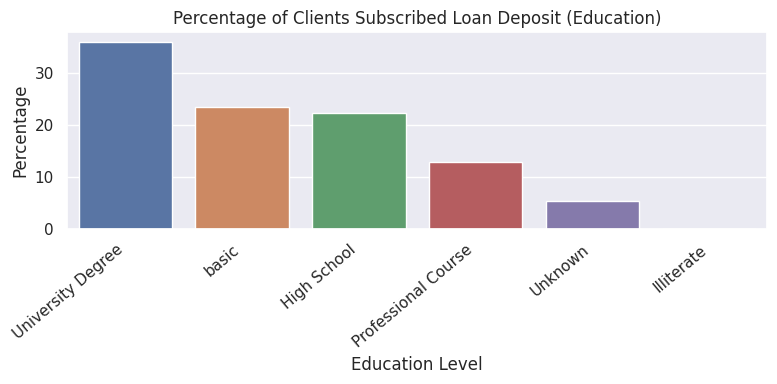

In [22]:
ax = sns.barplot(data=education_percentages,x='education_level',y='percentage')

# Set up the axes
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Clients Subscribed Loan Deposit (Education)')

# Rotate the axes labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

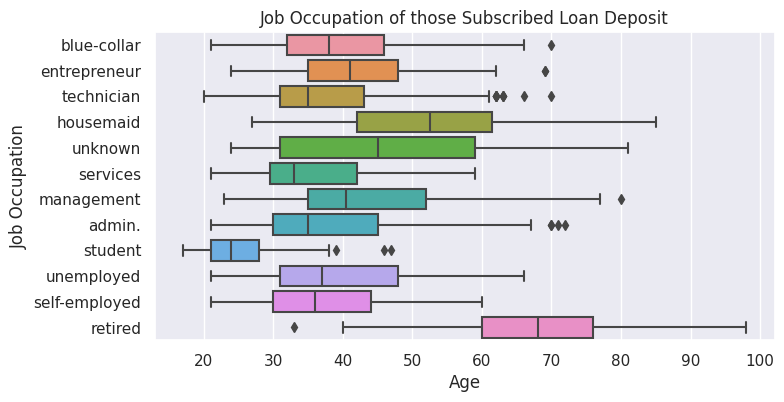

In [23]:
sns.set_style('darkgrid')
g = sns.boxplot(data=yes_data,y='job',x='age',orient = 'h')

g.set_xlabel('Age')
g.set_ylabel('Job Occupation')
g.set_title('Job Occupation of those Subscribed Loan Deposit')

plt.show(g);

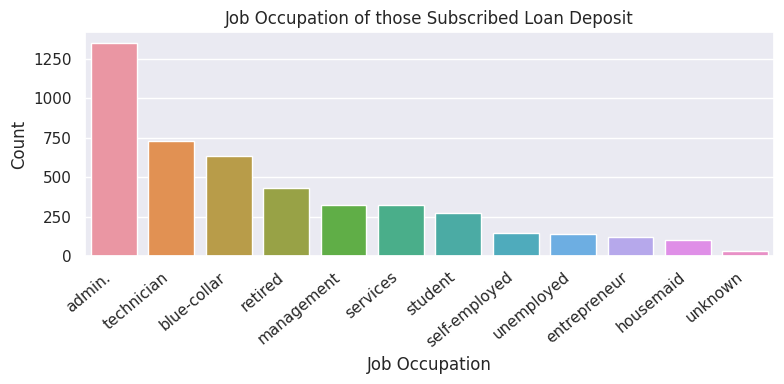

In [24]:
# Another way to look at job occupations of those Subscribed
#-----------------------------------------------------------
ax = sns.countplot(data=yes_data,x='job', order=yes_data.job.value_counts().index)

# Set up the plot axes
sns.set_style("whitegrid")
ax.set_ylabel('Count')
ax.set_xlabel('Job Occupation')
ax.set_title('Job Occupation of those Subscribed Loan Deposit')

# Rotate the x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Pour la profession, afin de souscrire un dépôt de prêt, les données montrent que le client doit être plus susceptible de faire partie des professions standard par rapport à d'autres professions telles que l'entrepreneur, la femme de ménage. Presque la preuve d'un revenu stable.

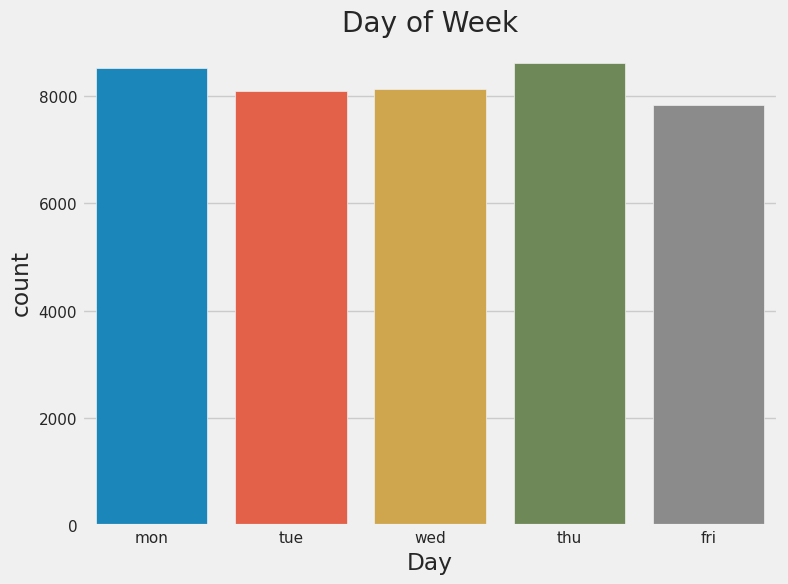

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))

sns.countplot(data = data, x = 'day_of_week')
plt.xlabel('Day')
plt.title('Day of Week')
plt.show()

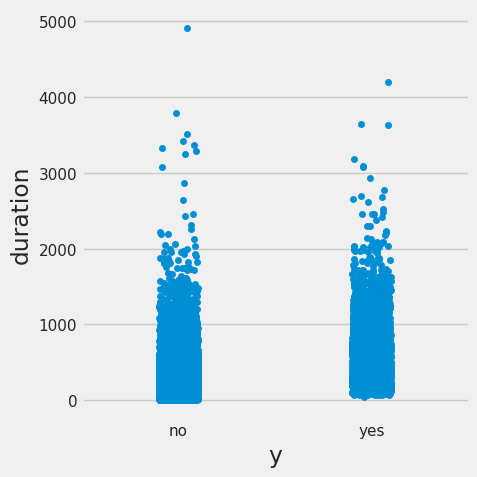

In [26]:
sns.catplot(data=data, x='y',y='duration')

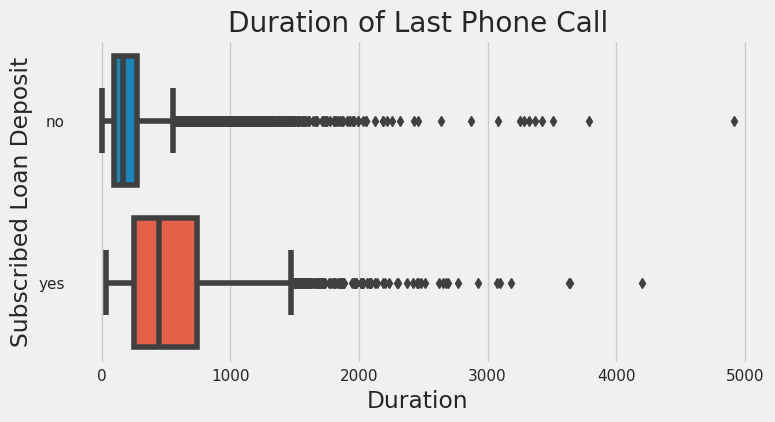

In [27]:
g = sns.boxplot(data=data, x='duration', y='y',orient = 'h')

g.set_xlabel('Duration')
g.set_ylabel('Subscribed Loan Deposit')
g.set_title('Duration of Last Phone Call')

plt.show(g);

**Matrice de corrélation**

In [28]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = data.select_dtypes(include=numerics).columns.tolist()
corr_metrics = data[num_features].corr(method='pearson')
corr_metrics.style.background_gradient()

In [29]:
# If the correlation between two features is extremely high we will discard one of the features. We want to avoid multicollinearity
columns = np.full((corr_metrics.shape[0],), True, dtype=bool)
for i in range(corr_metrics.shape[0]):
    for j in range(i+1, corr_metrics.shape[0]):
        if corr_metrics.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
                
numerical_selected_columns = corr_metrics.columns[columns]
numerical_selected_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx'],
      dtype='object')

Si la corrélation entre deux caractéristiques est extrêmement élevée, nous allons jeter l’une des caractéristiques. Nous voulons éviter la multicollinéarité

In [30]:
objects = ['object','category', 'bool']
cat_features = data.select_dtypes(include=objects).columns.tolist()

# Remove the target varible
cat_features.remove('y')

# Categorical Features
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

**Analyse de la variable Job**

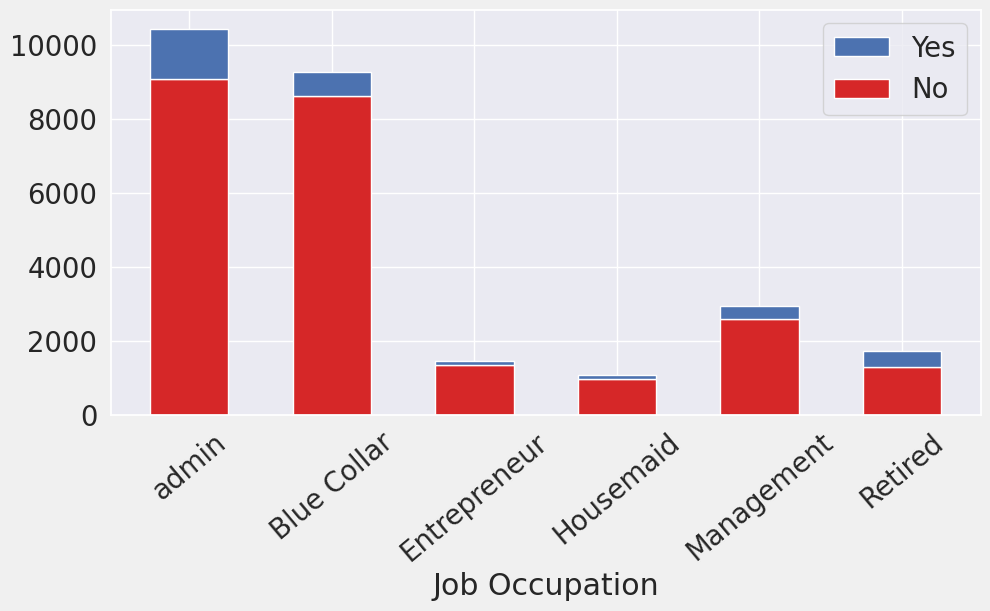

In [31]:
data['job'] = data['job'].str.replace('-','_').str.replace('.','', regex=True)
contingency_table = pd.crosstab( data['y'], data['job'],margins = True)
no_count = contingency_table.iloc[0][0:6].values
yes_count = contingency_table.iloc[1][0:6].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["admin","Blue Collar","Entrepreneur","Housemaid","Management","Retired"]
p1 = plt.bar(categories, no_count, 0.55, color='#d62728')
p2 = plt.bar(categories, yes_count, 0.55, bottom=no_count)
plt.legend((p2[0], p1[0]), ('Yes', 'No'))


plt.xlabel('Job Occupation')
plt.xticks(rotation=40)
#plt.ylabel('Count')
plt.show()

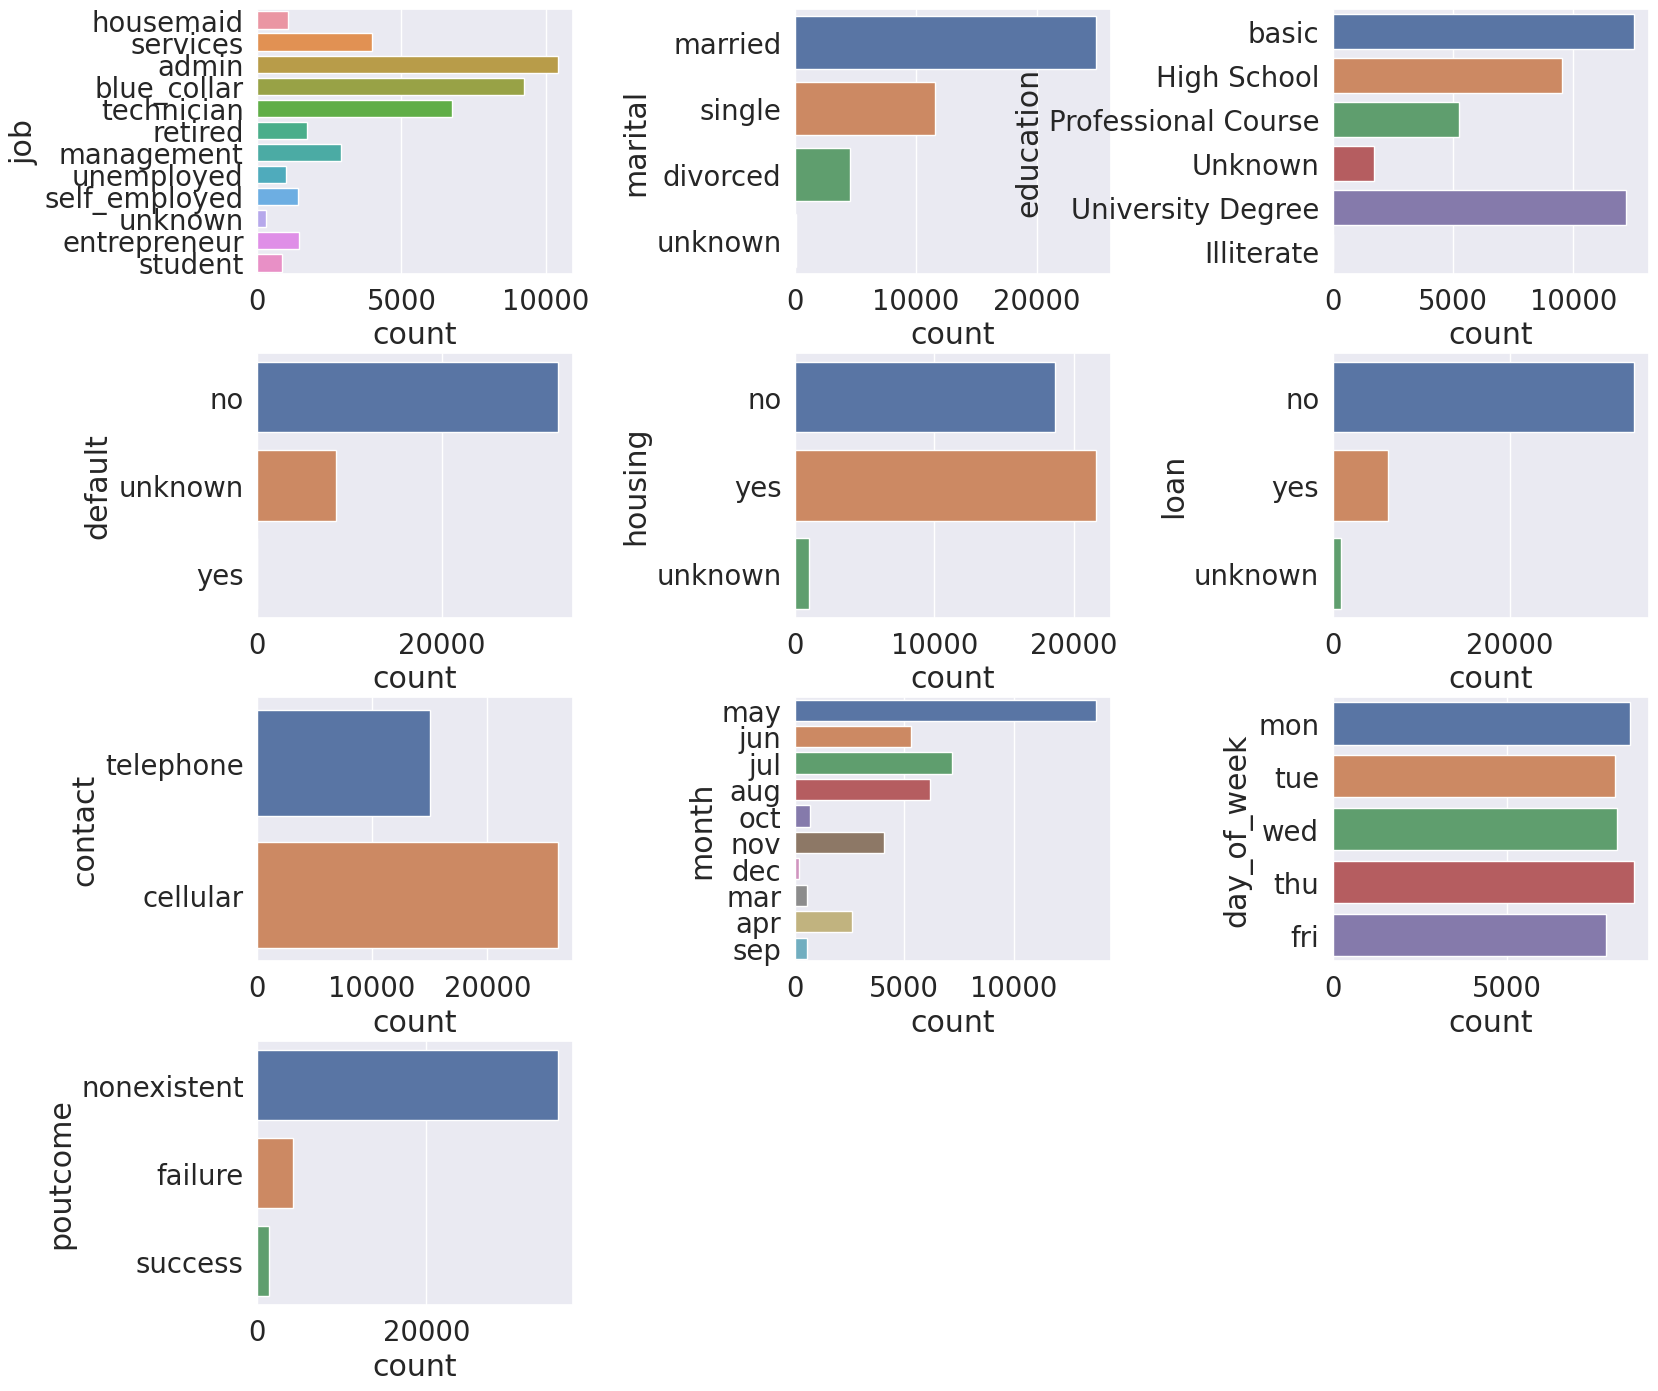

In [32]:
categorical_vars = data.describe(include=["object"]).columns
continuous_vars = data.describe().columns
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=data, ax=ax)

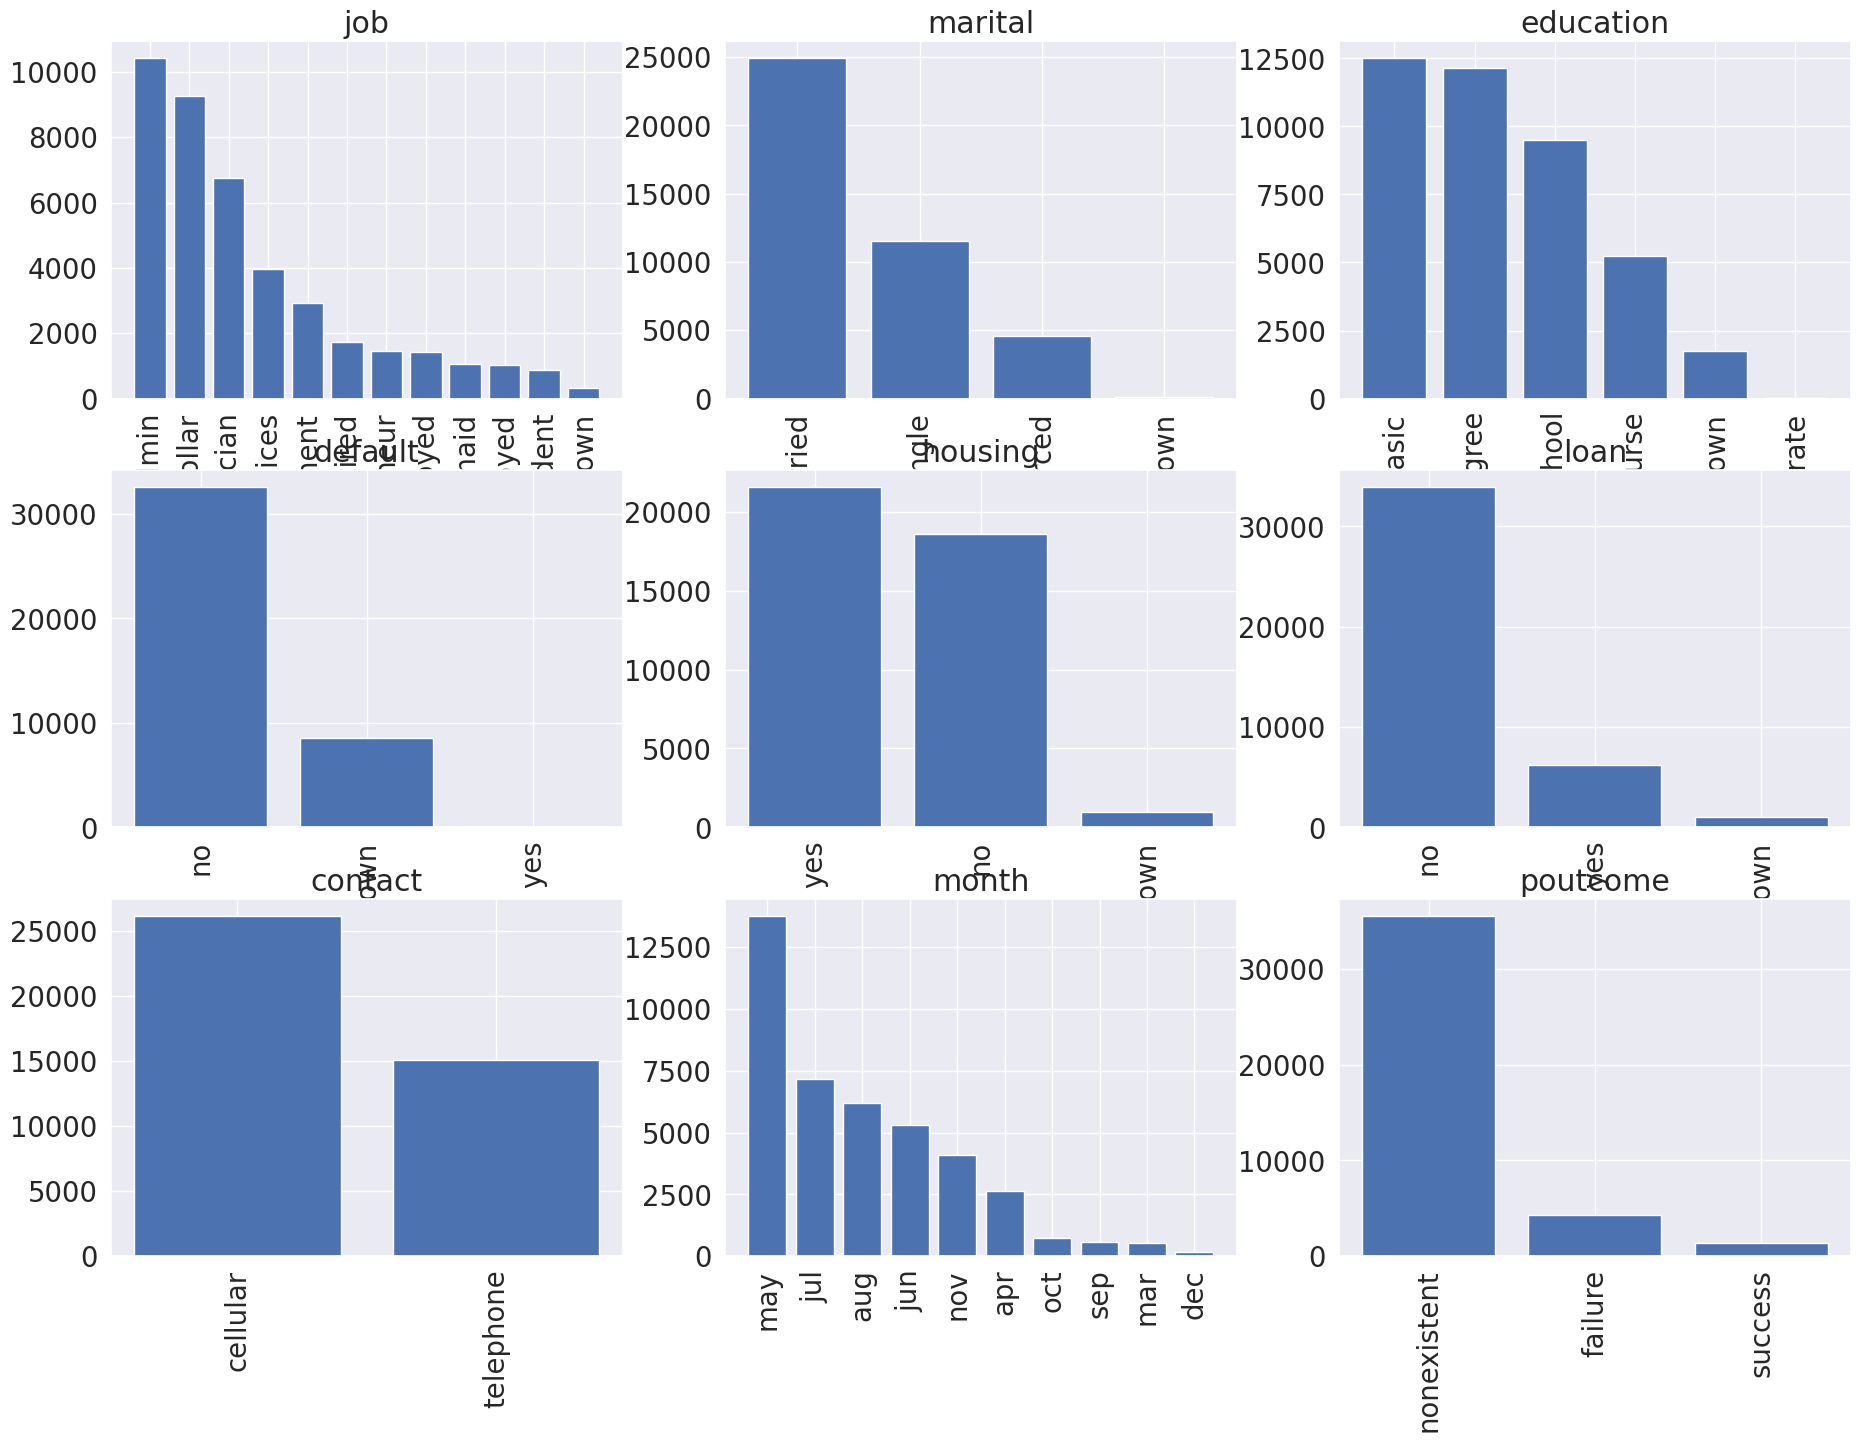

In [33]:
df=data
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

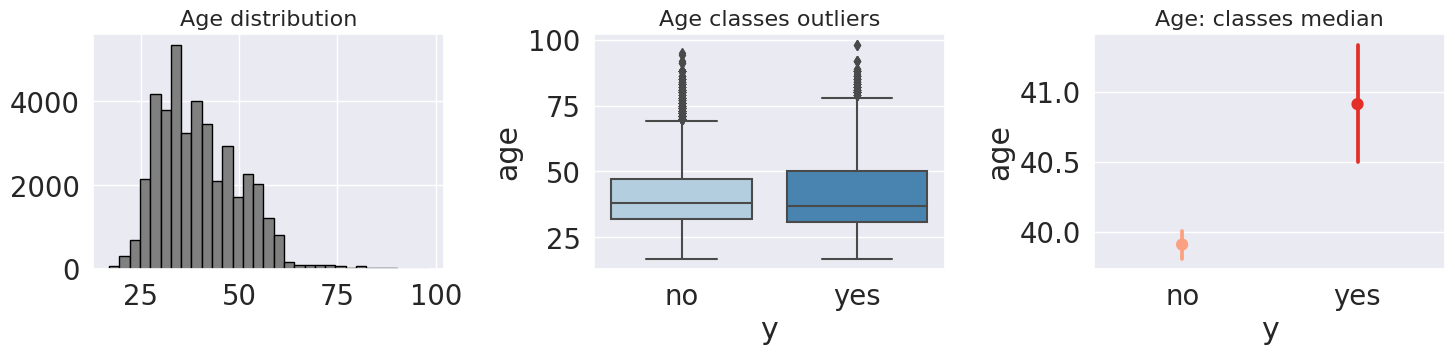

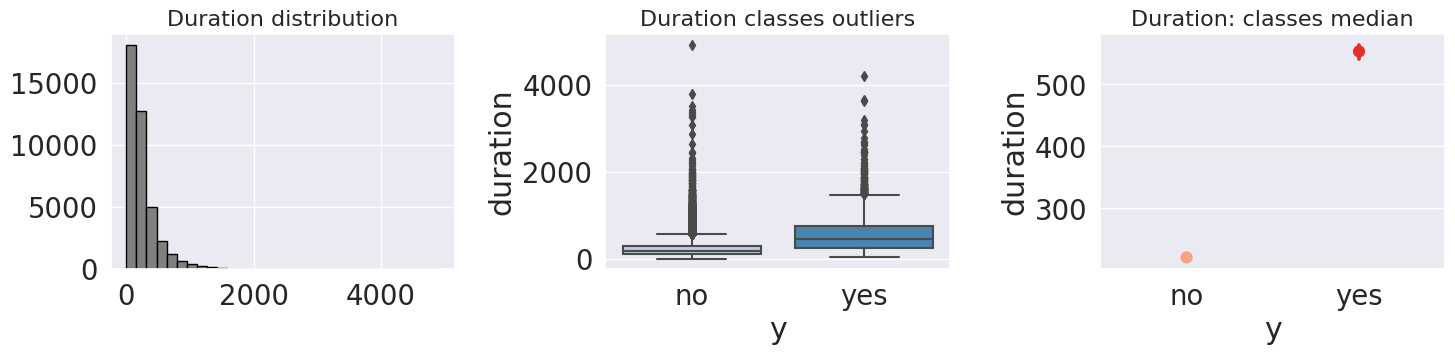

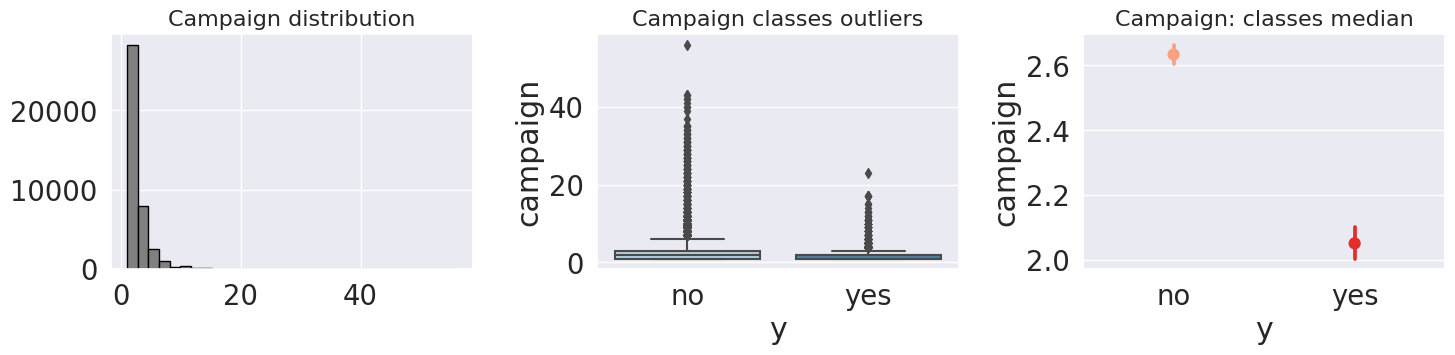

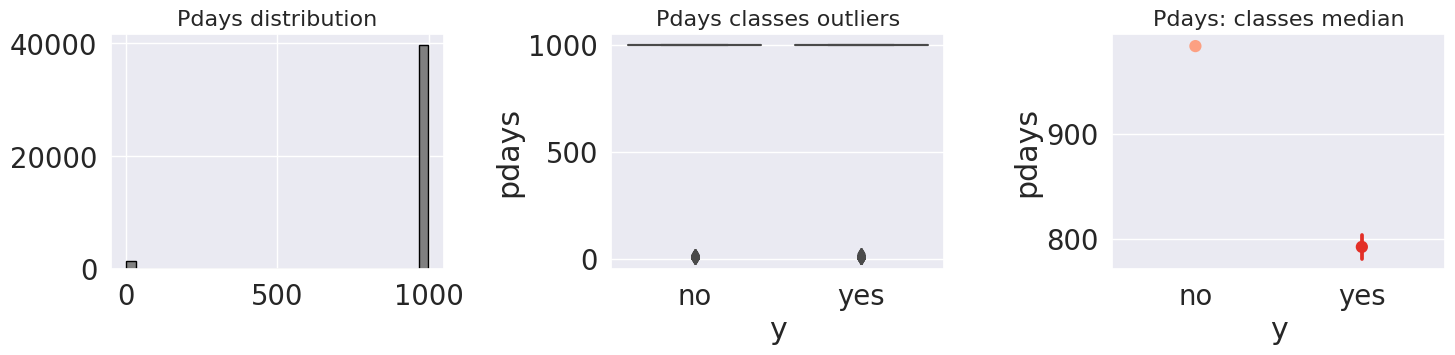

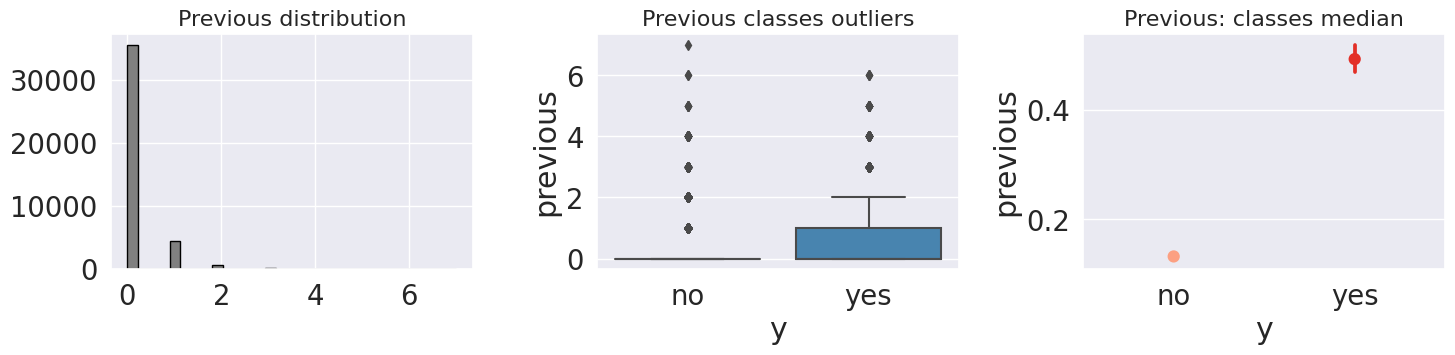

In [34]:
var_num = df.select_dtypes(['int64']).columns.values
var_cat = df.select_dtypes(['object']).columns.values
for col in var_num:
    # setting for multiple graphs
    fig, axs =  plt.subplots(nrows=1, ncols=3, figsize = (15,4))
    axs = axs.reshape(-1)
    
    # plotting the gerneral histogram
    axs[0].hist(df[col], bins=31, edgecolor = 'black', color = 'grey')#color = '#292929')
    axs[0].set_title(col.title() + ' distribution', fontsize=16)
    
    # plotting boxcox
    sns.boxplot(data=df, y=col, x='y', ax=axs[1], palette = 'Blues')
    axs[1].set_title(col.title() + ' classes outliers', fontsize=16)
    
    # plotting meadian of the subscrition (no/yes) classes
    sns.pointplot(data=df,y= col, x='y', ax=axs[2], palette = 'Reds')
    axs[2].set_title(col.title() + ': classes median', fontsize=16)
    
    
    
    plt.tight_layout()
    plt.show()

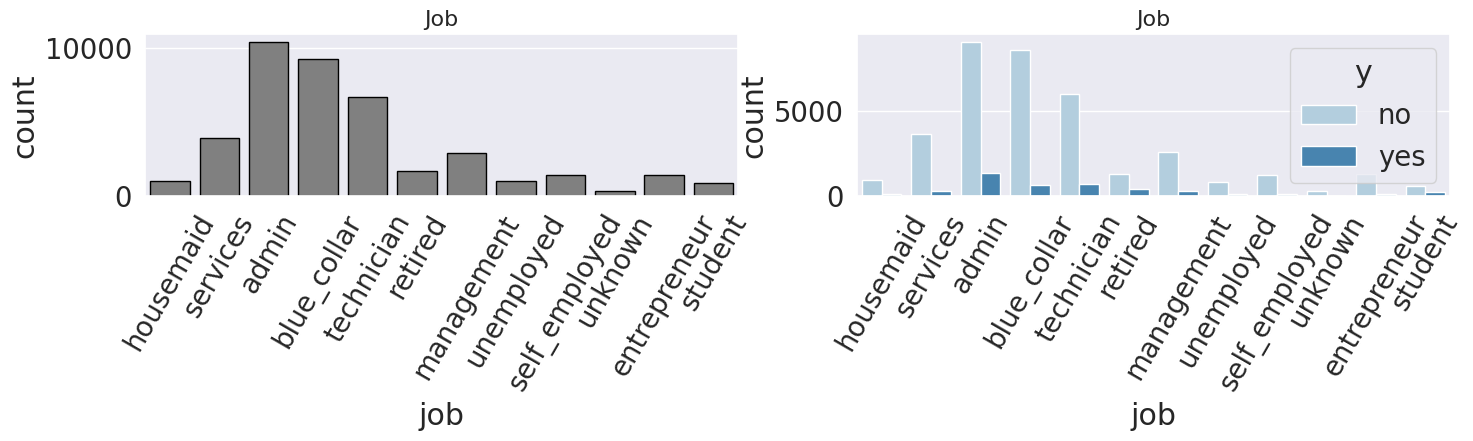

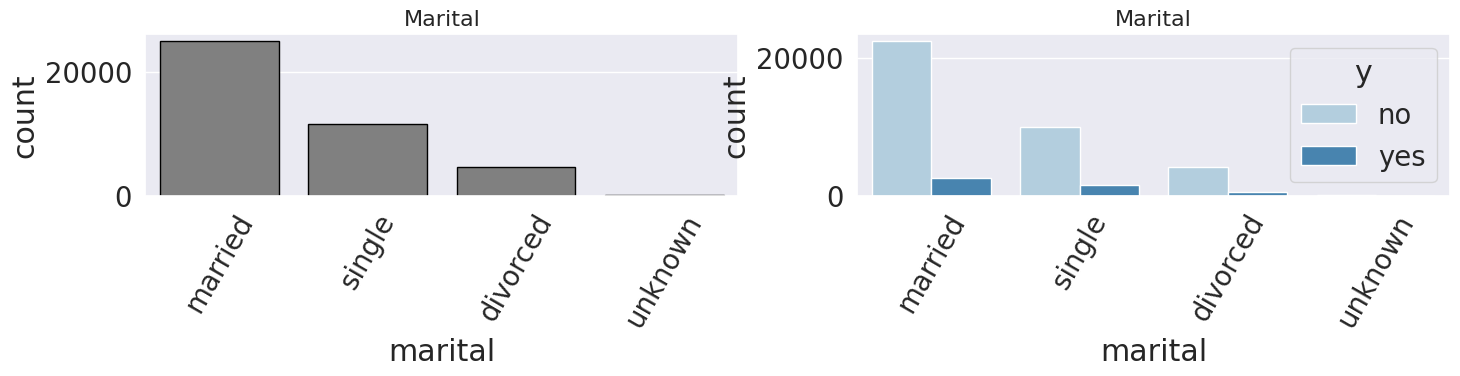

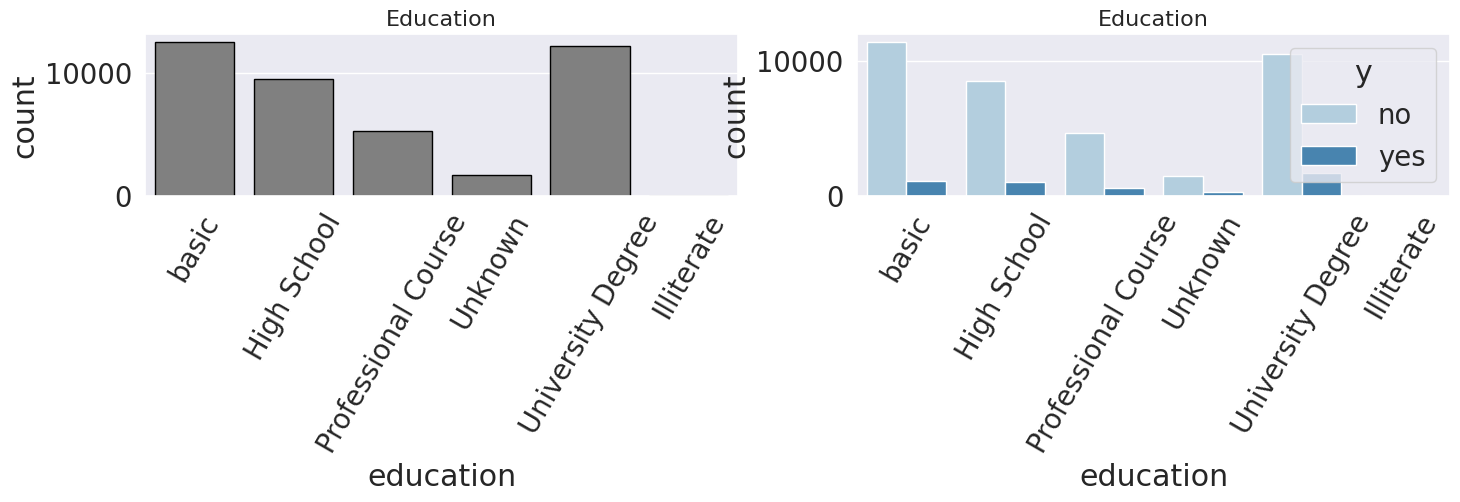

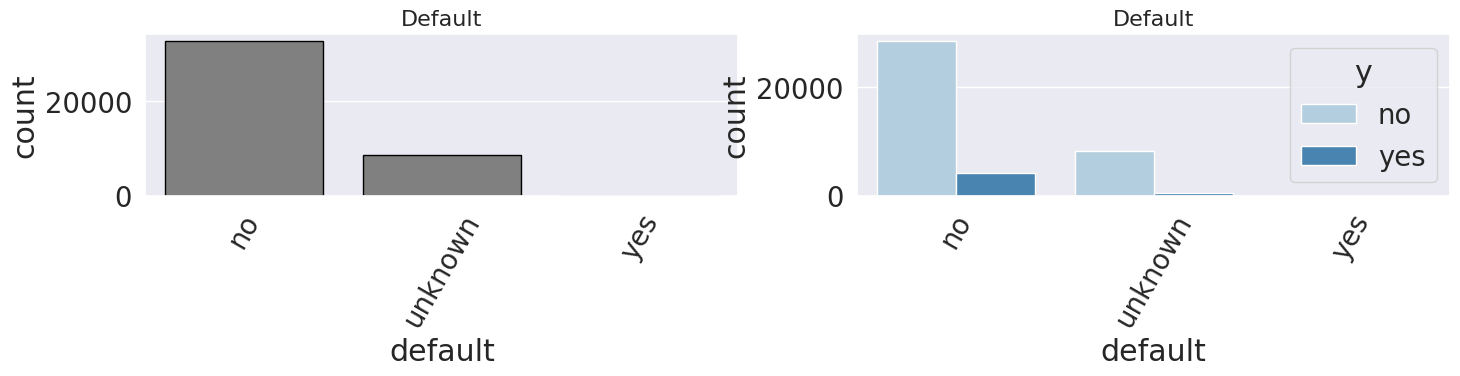

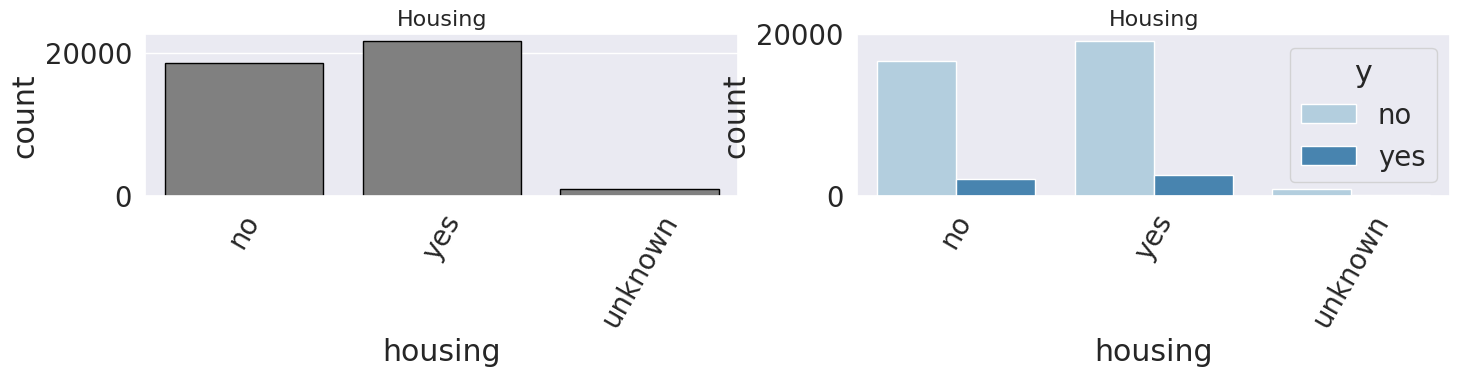

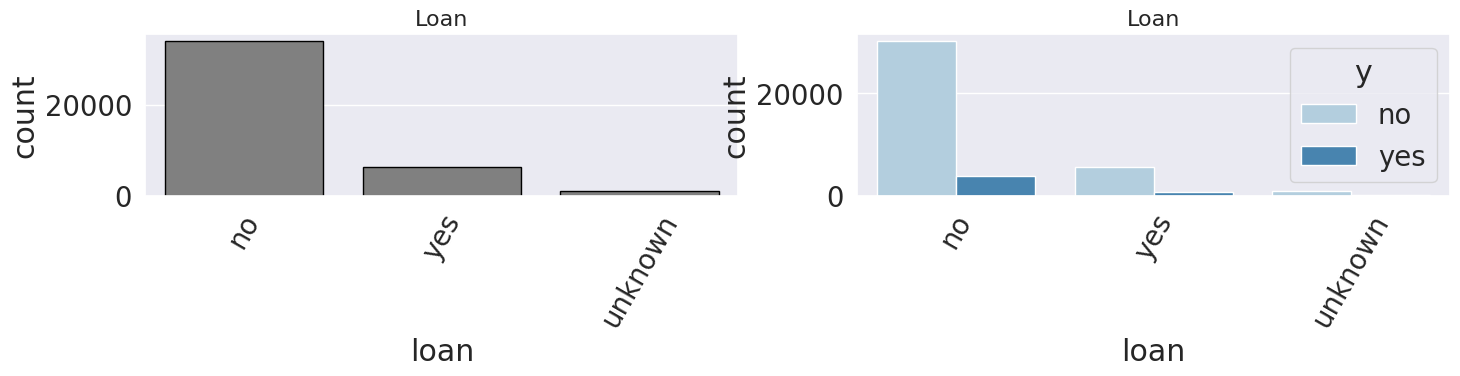

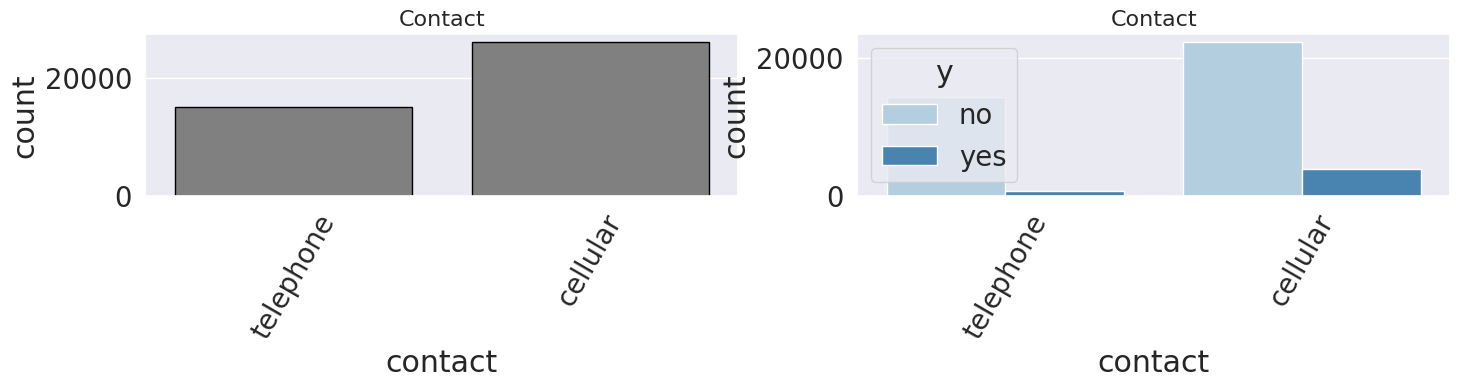

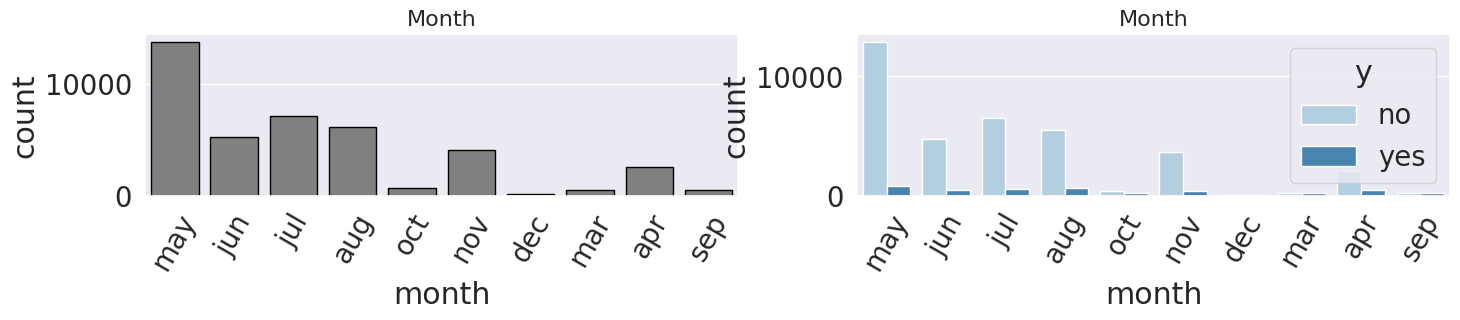

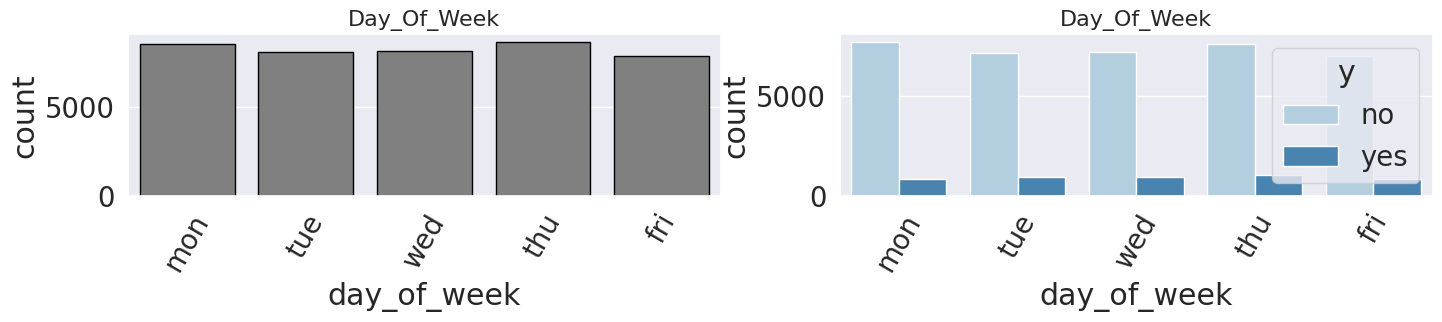

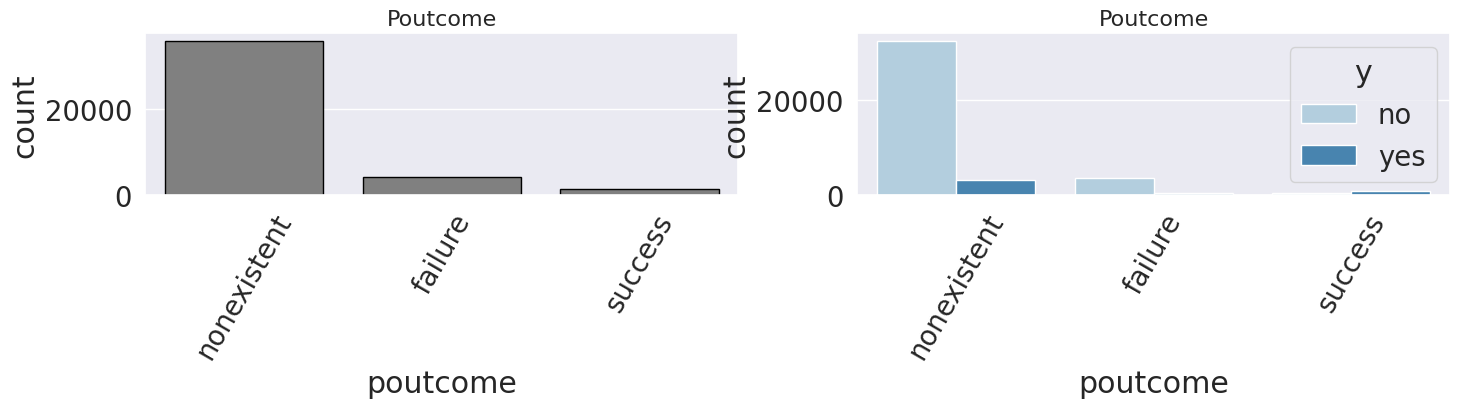

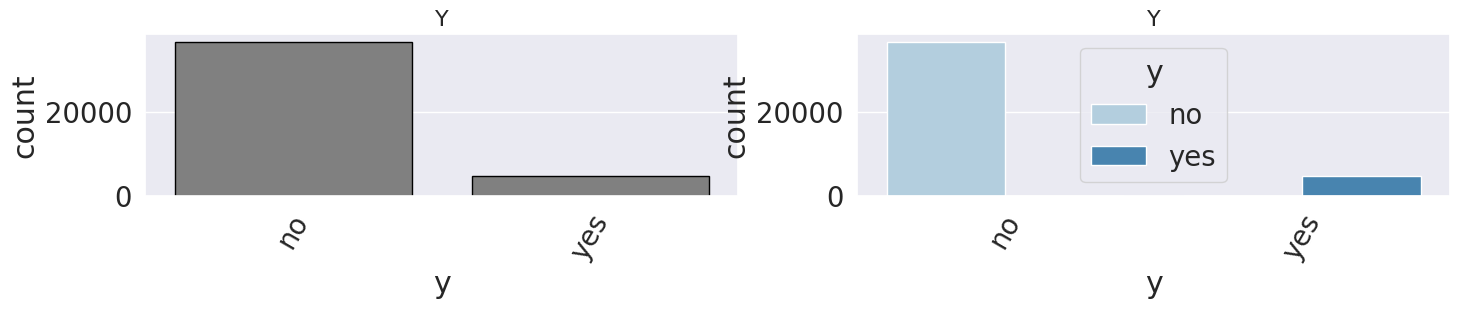

In [35]:
for col in var_cat:
    
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (15,2))
    axs = axs.reshape(-1)
    
    sns.countplot(data=df, x=col, ax=axs[0], edgecolor = 'black', color = 'grey')
    axs[0].set_title(col.title(), fontsize=16)
    axs[0].set_xticklabels(labels = df[col].unique(), rotation=60)
    
    sns.countplot(data=df, x= col, hue='y', ax=axs[1], palette = 'Blues', edgecolor = 'w')
    axs[1].set_title(col.title(), fontsize=16)
    axs[1].set_xticklabels(labels = df[col].unique(), rotation=60)

In [36]:
# The proportion of unknown value in each column
col_unknwn = ['job', 'education', 'contact', 'poutcome']
for col in col_unknwn:
    proportion = data[data[col]=='unknown'][col].count()/data[col].count()
    print('Unknown in column \"{}\": {:.1%}'.format(col, proportion))

Unknown in column "job": 0.8%
Unknown in column "education": 0.0%
Unknown in column "contact": 0.0%
Unknown in column "poutcome": 0.0%


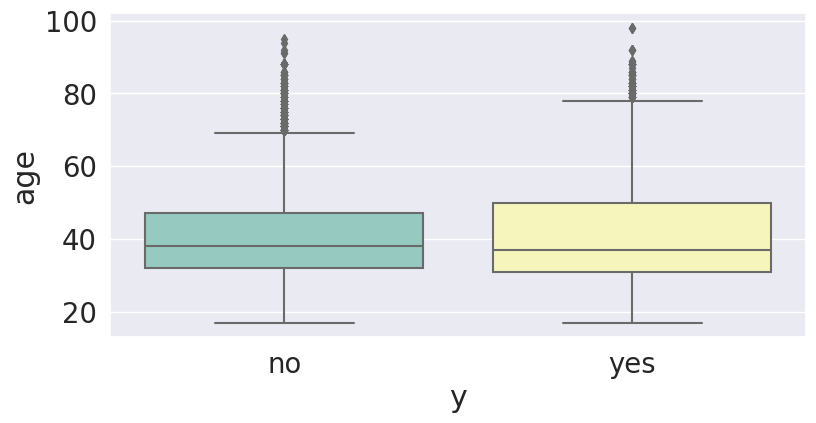

In [37]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age", palette="Set3")
plt.show()

D'après la boîte à moustaches ci-dessus, nous savons que pour les clients qui ont souscrit ou non un dépôt à terme, l'âge médian est d'environ 38-40. Et la boîte à moustaches pour les deux classes se chevauche beaucoup, ce qui signifie que l'âge n'est pas nécessairement un bon indicateur pour savoir quel client s'abonnera et quel client ne le fera pas.

<Axes: xlabel='age_group', ylabel='count'>

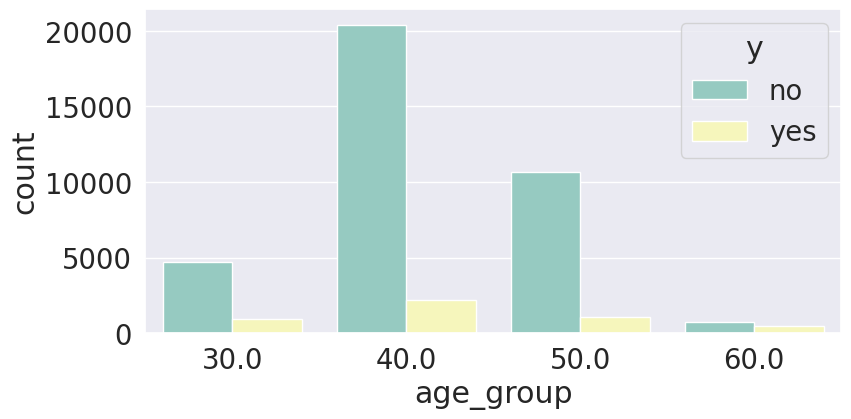

In [38]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
count_age_response_pct = pd.crosstab(data['y'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()
sns.countplot(x='age_group', data=data, hue='y', palette="Set3")

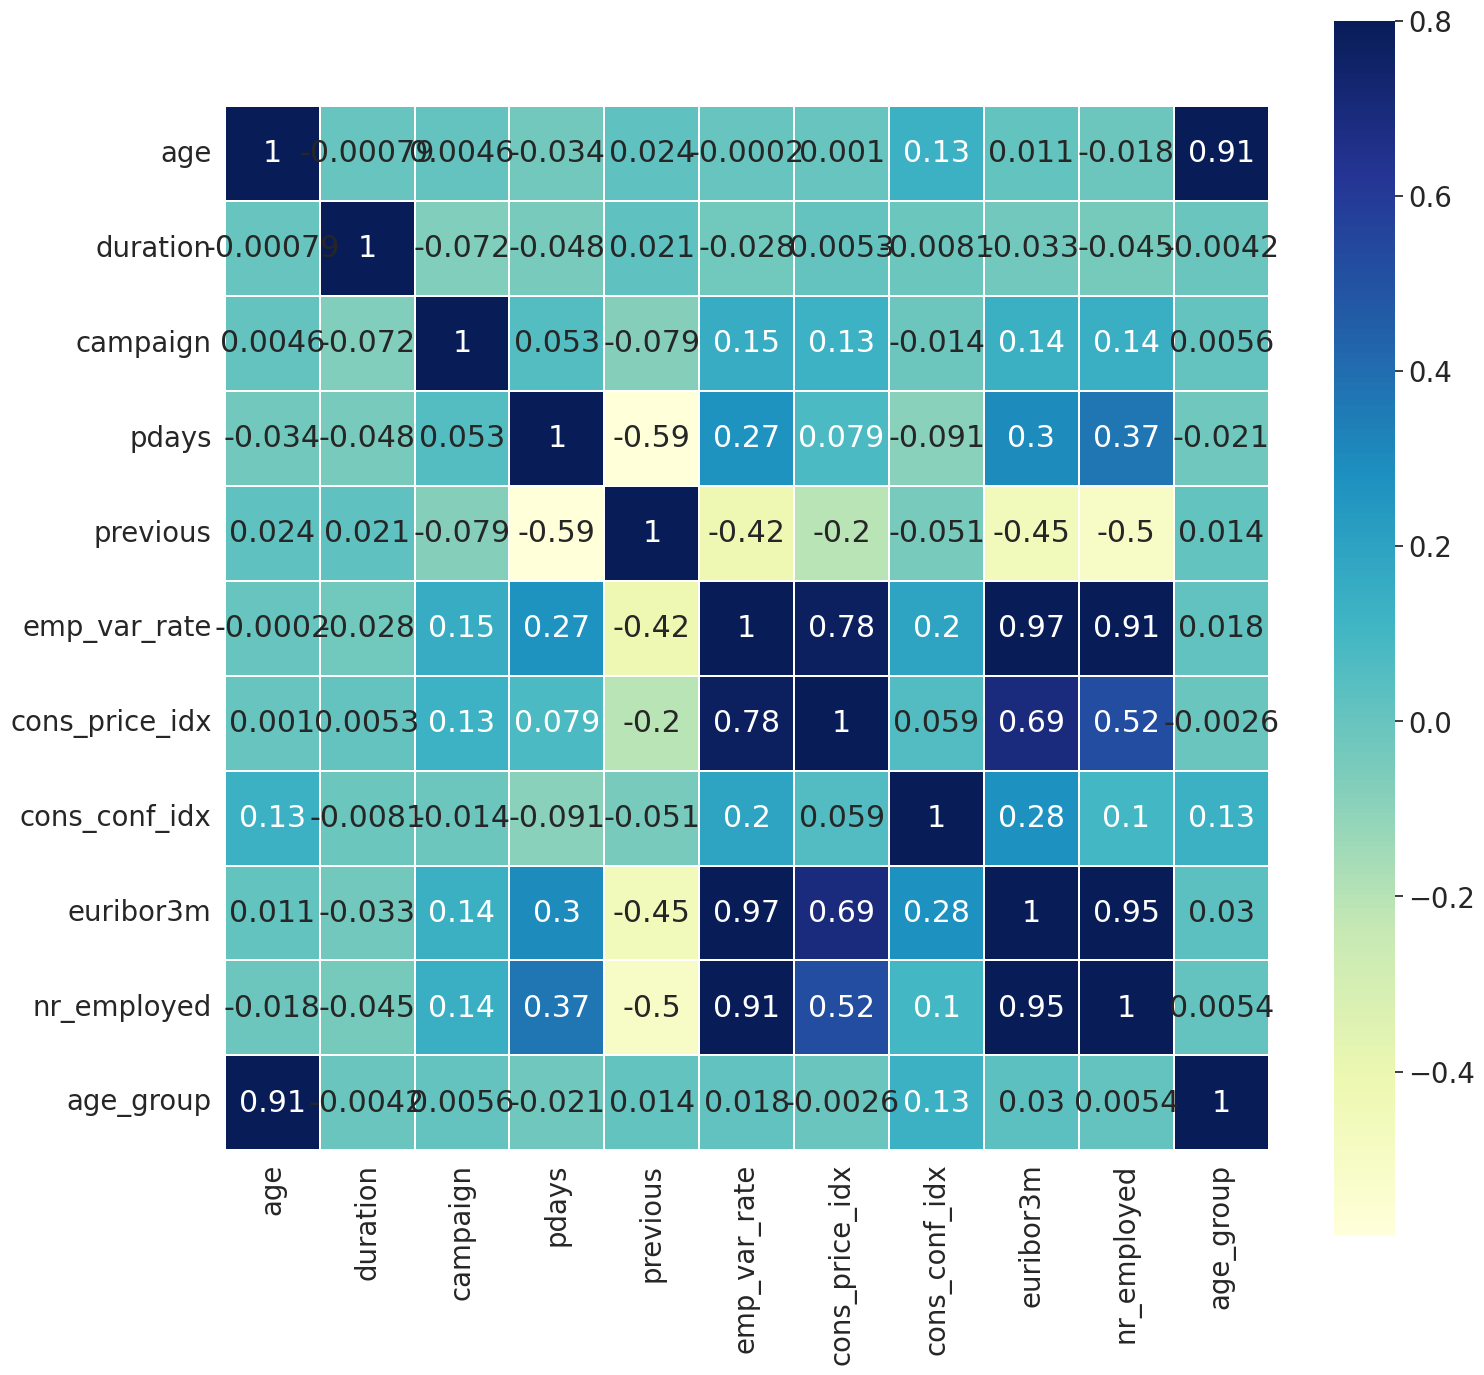

In [39]:
def drawheatmap(df):
    matrix = data.corr()
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(matrix, vmax=.8, square=True, cmap='YlGnBu', ax=ax, annot=True, linewidth=0.1)
drawheatmap(data)

La corrélation entre euribor3m et nr_employed est extrêmement élevée 94,51 %

Ainsi est :

euribor3m - emp_var_rate : 97,2256

nr_employed - emp_var_rate : 90,60 %

emp_var_rate - cons_price_idx : 77,53 %

**L'encodage des variables categorielles**

In [40]:
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')
data.contact = data.contact.map({'cellular': 1, 'telephone': 0}).astype('uint8') 
data.loan = data.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
data.housing = data.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
data.default = data.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')
data.pdays = data.pdays.replace(999, 0) # replace with 0 if not contact 
data.previous = data.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8') # binary has contact or not

# binary if were was an outcome of marketing campane
data.poutcome = data.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

# change the range of Var Rate
data['emp_var_rate'] = data['emp_var_rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
data['emp_var_rate'] = data['emp_var_rate'] * -1
data['emp_var_rate'] = data['emp_var_rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

# Multiply consumer index 
data['cons_price_idx'] = (data['cons_price_idx'] * 10).astype('uint8')

# change the sign (we want all be positive values)
data['cons_conf_idx'] = data['cons_conf_idx'] * -1

# re-scale variables
data['nr_employed'] = np.log2(data['nr_employed']).astype('uint8')
data['cons_price_idx'] = np.log2(data['cons_price_idx']).astype('uint8')
data['cons_conf_idx'] = np.log2(data['cons_conf_idx']).astype('uint8')
data.age = np.log(data.age)

# less space
data.euribor3m = data.euribor3m.astype('uint8')
data.campaign = data.campaign.astype('uint8')
data.pdays = data.pdays.astype('uint8')

# fucntion to One Hot Encoding
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

# One Hot encoding of 3 variable 
data = encode(data, data.job)
data = encode(data, data.month)
data = encode(data, data.day_of_week)
! pip install --upgrade category_encoders
import category_encoders as ce
# Drop tranfromed features
data.drop(['job', 'month', 'day_of_week'], axis=1, inplace=True)
data.drop_duplicates(inplace=True) 
def duration(data):
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration'] = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 645), 'duration'] = 4
    data.loc[data['duration']  > 645, 'duration'] = 5
    return data
duration(data);
# save target variable before transformation
y = data.y
# Create target encoder object and transoform two value
target_encode = ce.target_encoder.TargetEncoder(cols=['marital', 'education']).fit(data, y)
numeric_dataset = target_encode.transform(data)
# drop target variable
numeric_dataset.drop('y', axis=1, inplace=True)
display(numeric_dataset.head(3), numeric_dataset.shape, y.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.1 MB/s eta 0:00:00


age   marital  education  default  housing  loan  contact  duration  \
0  4.025352  0.101577   0.087064        1        0     0        0         3   
1  4.043051  0.101577   0.108389        0        0     0        0         2   
2  3.610918  0.101577   0.108389        1        1     0        0         3   

   campaign  pdays  ...  month_mar  month_may  month_nov  month_oct  \
0         1      0  ...          0          1          0          0   
1         1      0  ...          0          1          0          0   
2         1      0  ...          0          1          0          0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0          0                0                1                0   
1          0                0                1                0   
2          0                0                1                0   

   day_of_week_tue  day_of_week_wed  
0                0                0  
1                0                0  
2                0                0  

[3 rows x 45 columns]

(41172, 45)

(41172,)

In [41]:
numeric_dataset=numeric_dataset.drop(['age_group','euribor3m','nr_employed'],axis=1)

In [42]:
random_state = 11
X=numeric_dataset.copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=random_state,stratify=y)

In [43]:
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})
calculate_vif(X,X.columns)

VIF  Tolerance
age                1.572548   0.635910
marital            1.311007   0.762772
education          1.560188   0.640948
default            1.140004   0.877190
housing            1.014708   0.985505
loan               1.004598   0.995423
contact            2.996107   0.333766
duration           1.032941   0.968109
campaign           1.049646   0.952703
pdays              2.253930   0.443669
previous           1.602696   0.623949
poutcome           2.410399   0.414869
emp_var_rate       3.486421   0.286827
cons_price_idx          inf   0.000000
cons_conf_idx      1.482276   0.674638
job_admin               inf   0.000000
job_blue_collar         inf   0.000000
job_entrepreneur        inf   0.000000
job_housemaid           inf   0.000000
job_management          inf   0.000000
job_retired             inf   0.000000
job_self_employed       inf   0.000000
job_services            inf   0.000000
job_student             inf   0.000000
job_technician          inf   0.000000
job_unemployed          inf   0.000000
job_unknown             inf   0.000000
month_apr               inf   0.000000
month_aug               inf   0.000000
month_dec               inf   0.000000
month_jul               inf   0.000000
month_jun               inf   0.000000
month_mar               inf   0.000000
month_may               inf   0.000000
month_nov               inf   0.000000
month_oct               inf   0.000000
month_sep               inf   0.000000
day_of_week_fri         inf   0.000000
day_of_week_mon         inf   0.000000
day_of_week_thu         inf   0.000000
day_of_week_tue         inf   0.000000
day_of_week_wed         inf   0.000000

In [44]:
train_accuracy = []
test_accuracy = []
models = ['Logistic Regression','SVM without kernel','SVM with linear kernel','SVM with sigmoid kernel','KNN','Decision Tree','Neural Perceptron']

Fonctions qui calcule les métriques d'évaluation

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
    
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")

def train_test_error(y_train,y_test):
      train_error =((y_train==Y_train).sum())/len(y_train)*100
      test_error =((y_test==Y_test).sum())/len(Y_test)*100
      train_accuracy.append(train_error)
      test_accuracy.append(test_error)

Fonction qui fait le plot des modèles 

In [46]:
def plot_auc(model,train_proba,train_predict,test_proba,test_predict):
    train_test_error(train_predict , test_predict)
    fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, test_proba[:, 0])
    fpr2,tpr2,thresholds2 = metrics.roc_curve(Y_train,train_proba[:, 0])
    print_score(model, X_train, Y_train, X_test, Y_test, train=True)
    print_score(model, X_train, Y_train, X_test, Y_test, train=False)
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_auc_score
    x = plt.subplot( )
    x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(Y_test,test_predict)))
    x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(Y_train,train_predict)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    x.legend()
    plt.show()
    class_names = ['Predicted positive','Predicted negative']
    class_names1 = ['Actually positive','Actually negative']
    df_heatmap = pd.DataFrame(confusion_matrix(Y_test, test_predict.round()), index=class_names, columns=class_names1 )
    fig = plt.figure( )
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

**Le modèle Logistic regression**

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.925711     0.657007  0.908015      0.791359      0.895438
recall         0.974543     0.384047  0.908015      0.679295      0.908015
f1-score       0.949500     0.484742  0.908015      0.717121      0.897138
support    25573.000000  3247.000000  0.908015  28820.000000  28820.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.924840     0.662025  0.908031      0.793433      0.895222
recall         0.975639     0.375718  0.908031      0.675679      0.908031
f1-score       0.949560     0.479377  0.908031      0.714469      0.896573
support    10960.000000  1392.000000  0.908031  12352.000000  12352.000000


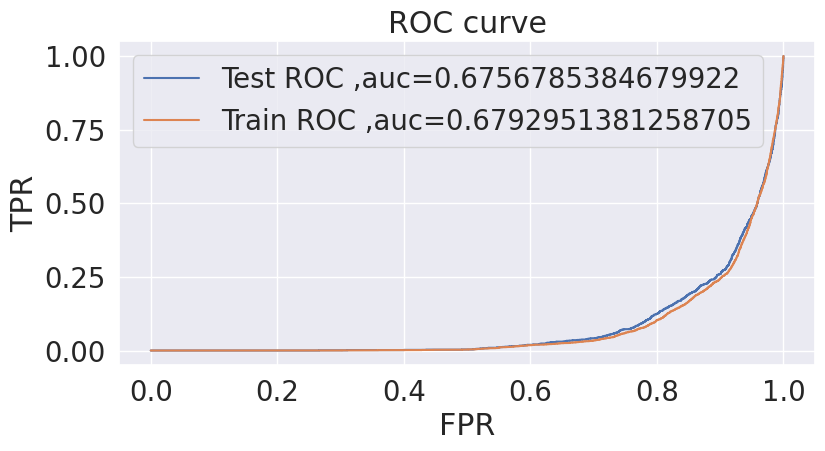

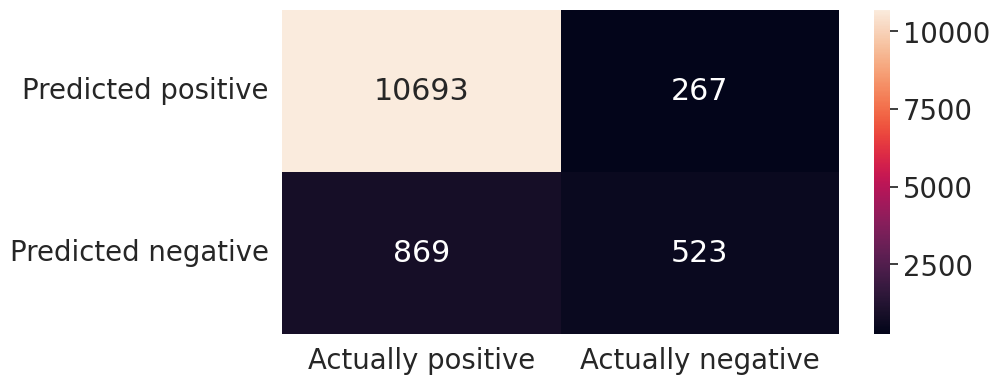

In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
train_predict = log_reg.predict(X_train)
train_proba=log_reg.predict_proba(X_train)
test_proba=log_reg.predict_proba(X_test)
test_predict = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_train)
y_pred = np.where(y_prob > 0.5, 1, 0)
plot_auc(log_reg,train_proba,train_predict,test_proba,test_predict)

# SVM without kernel

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.906702     0.721847  0.901006      0.814274      0.885875
recall         0.990341     0.197413  0.901006      0.593877      0.901006
f1-score       0.946678     0.310036  0.901006      0.628357      0.874951
support    25573.000000  3247.000000  0.901006  28820.000000  28820.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.906748     0.754821  0.902283      0.830784      0.889627
recall         0.991880     0.196839  0.902283      0.594359      0.902283
f1-score       0.947405     0.312251  0.902283      0.629828      0.875827
support    10960.000000  1392.000000  0.902283  12352.000000  12352.000000


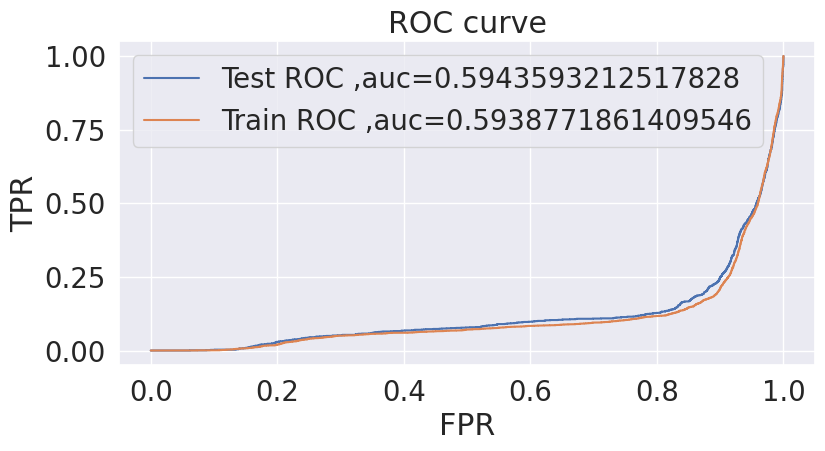

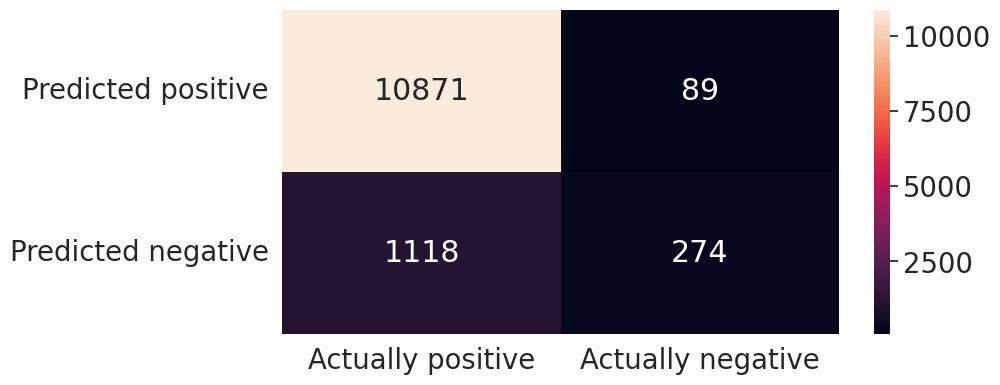

In [48]:
SVM = svm.SVC(probability=True)
SVM.fit(X_train,Y_train)
train_predict = SVM.predict(X_train)
test_predict = SVM.predict(X_test)
train_proba=SVM.predict_proba(X_train)
test_proba=SVM.predict_proba(X_test)
plot_auc(SVM,train_proba,train_predict,test_proba,test_predict)

**SVM avec kernel=linear**

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.905959     0.641182  0.896947      0.773571      0.876128
recall         0.986235     0.193717  0.896947      0.589976      0.896947
f1-score       0.944395     0.297540  0.896947      0.620967      0.871517
support    25573.000000  3247.000000  0.896947  28820.000000  28820.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.905769     0.676020  0.898478      0.790895      0.879878
recall         0.988412     0.190374  0.898478      0.589393      0.898478
f1-score       0.945288     0.297085  0.898478      0.621187      0.872239
support    10960.000000  1392.000000  0.898478  12352.000000  12352.000000


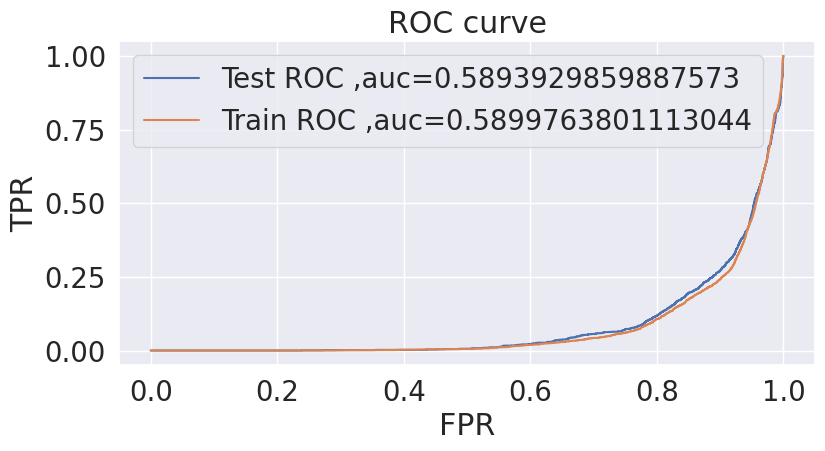

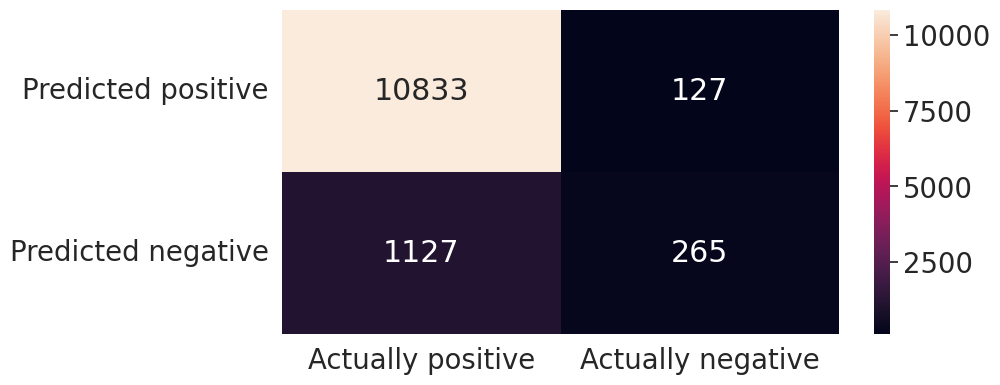

In [49]:
SVM_k= svm.SVC(kernel='linear',probability=True)
SVM_k.fit(X_train,Y_train)
train_predict = SVM_k.predict(X_train)
test_predict = SVM_k.predict(X_test)
train_proba=SVM_k.predict_proba(X_train)
test_proba=SVM_k.predict_proba(X_test)
plot_auc(SVM_k,train_proba,train_predict,test_proba,test_predict)

**SVM with kernel=sigmoid**

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.914081     0.362787  0.860826      0.638434      0.851969
recall         0.930630     0.311056  0.860826      0.620843      0.860826
f1-score       0.922281     0.334936  0.860826      0.628609      0.856108
support    25573.000000  3247.000000  0.860826  28820.000000  28820.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.915688     0.375727  0.863099      0.645707      0.854837
recall         0.931478     0.324713  0.863099      0.628095      0.863099
f1-score       0.923515     0.348362  0.863099      0.635939      0.858699
support    10960.000000  1392.000000  0.863099  12352.000000  12352.000000


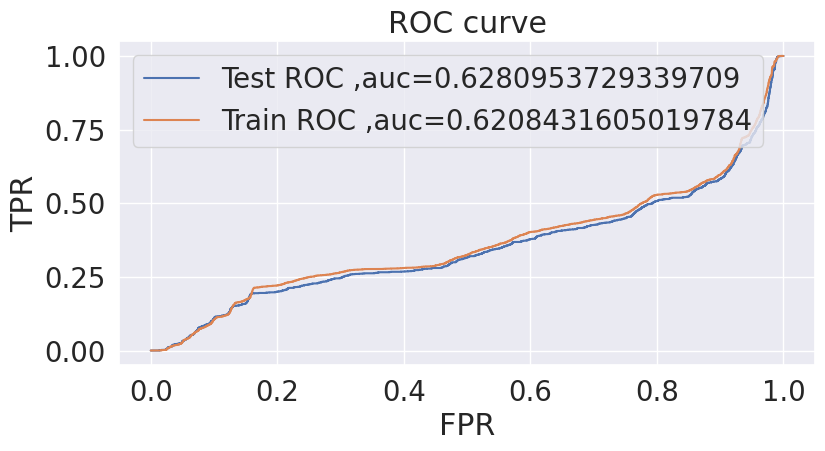

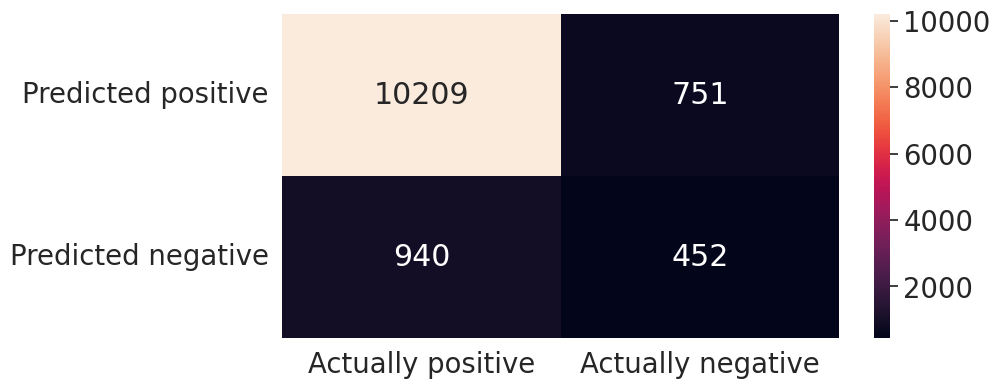

In [50]:
SVM_kk= svm.SVC(kernel='sigmoid',probability=True)
SVM_kk.fit(X_train,Y_train)
train_predict = SVM_kk.predict(X_train)
test_predict = SVM_kk.predict(X_test)
train_proba=SVM_kk.predict_proba(X_train)
test_proba=SVM_kk.predict_proba(X_test)
plot_auc(SVM_kk,train_proba,train_predict,test_proba,test_predict)

**Modèle KNN**

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999023     1.000000  0.999133      0.999512      0.999133
recall         1.000000     0.992301  0.999133      0.996150      0.999133
f1-score       0.999511     0.996135  0.999133      0.997823      0.999131
support    25573.000000  3247.000000  0.999133  28820.000000  28820.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.927670     0.563547  0.897749      0.745609      0.886636
recall         0.959580     0.410920  0.897749      0.685250      0.897749
f1-score       0.943356     0.475280  0.897749      0.709318      0.890606
support    10960.000000  1392.000000  0.897749  12352.000000  12352.000000


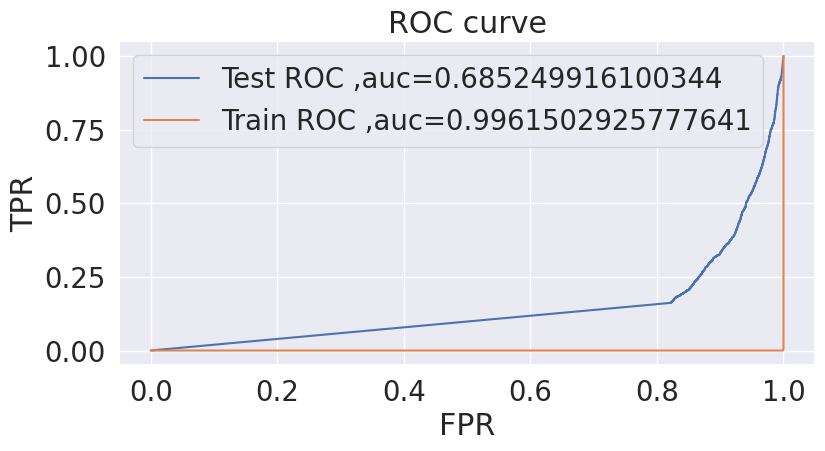

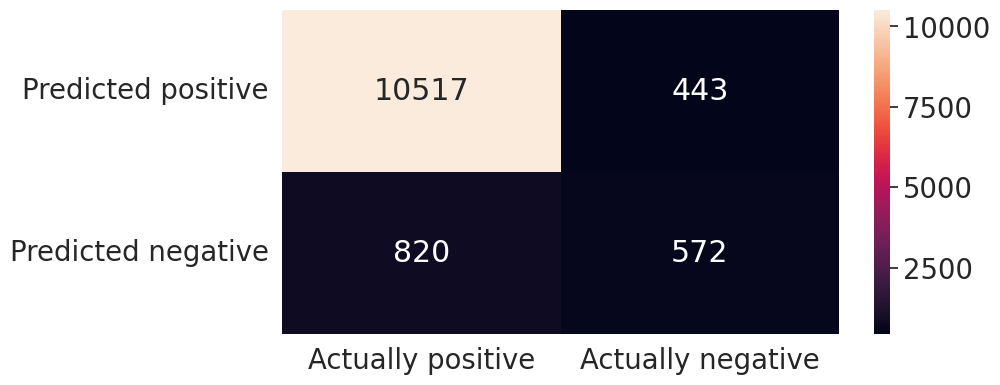

In [51]:
knn= neighbors.KNeighborsClassifier(weights='distance')
knn.fit(X_train,Y_train)
train_predict = knn.predict(X_train)
test_predict = knn.predict(X_test)
train_proba=knn.predict_proba(X_train)
test_proba=knn.predict_proba(X_test)
plot_auc(knn,train_proba,train_predict,test_proba,test_predict)

**Arbre de décision**

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999023     1.000000  0.999133      0.999512      0.999133
recall         1.000000     0.992301  0.999133      0.996150      0.999133
f1-score       0.999511     0.996135  0.999133      0.997823      0.999131
support    25573.000000  3247.000000  0.999133  28820.000000  28820.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.934095     0.475212  0.881639      0.704654      0.882382
recall         0.932391     0.482040  0.881639      0.707215      0.881639
f1-score       0.933242     0.478602  0.881639      0.705922      0.882007
support    10960.000000  1392.000000  0.881639  12352.000000  12352.000000


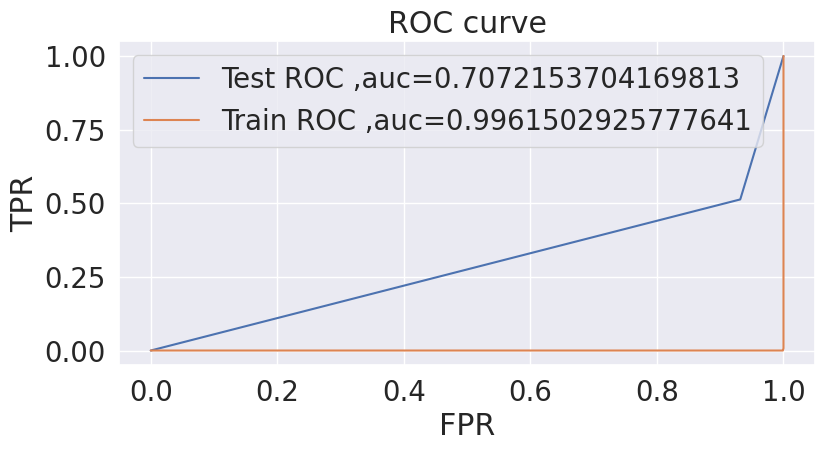

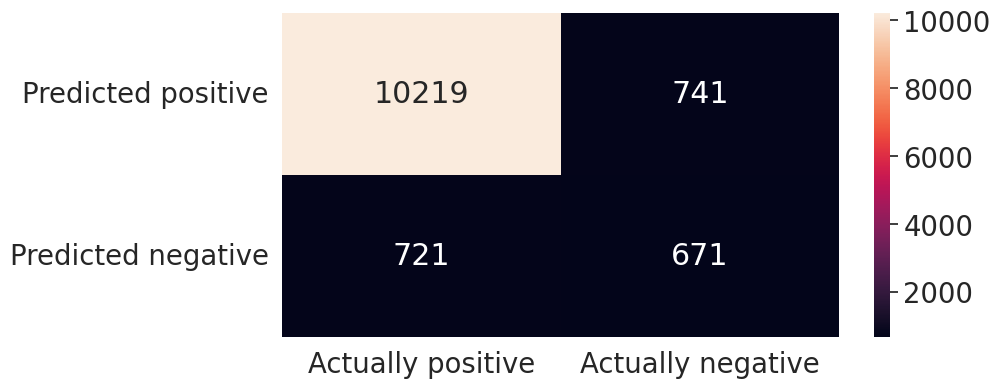

In [52]:
from sklearn import tree
dec= tree.DecisionTreeClassifier()
dec.fit(X_train,Y_train)
train_predict = dec.predict(X_train)
test_predict = dec.predict(X_test)
train_proba=dec.predict_proba(X_train)
test_proba=dec.predict_proba(X_test)
plot_auc(dec,train_proba,train_predict,test_proba,test_predict)

**Modèle MLP**

Train Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.939587     0.700680   0.92009      0.820134      0.912671
recall         0.972471     0.507545   0.92009      0.740008      0.920090
f1-score       0.955746     0.588677   0.92009      0.772211      0.914391
support    25573.000000  3247.000000   0.92009  28820.000000  28820.000000
Test Result:
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.931022     0.633229   0.90795      0.782126      0.897463
recall         0.967974     0.435345   0.90795      0.701660      0.907950
f1-score       0.949139     0.515964   0.90795      0.732552      0.900323
support    10960.000000  1392.000000   0.90795  12352.000000  12352.000000
Train Result:
_______________________________________________
CLASSIFICATION REPO

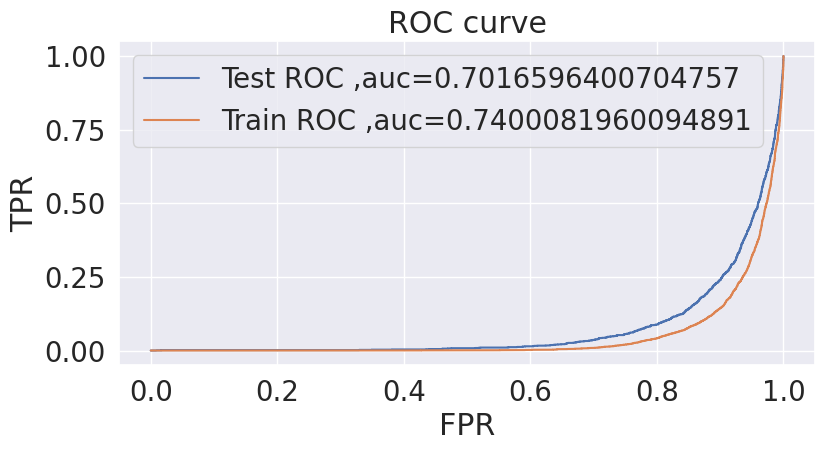

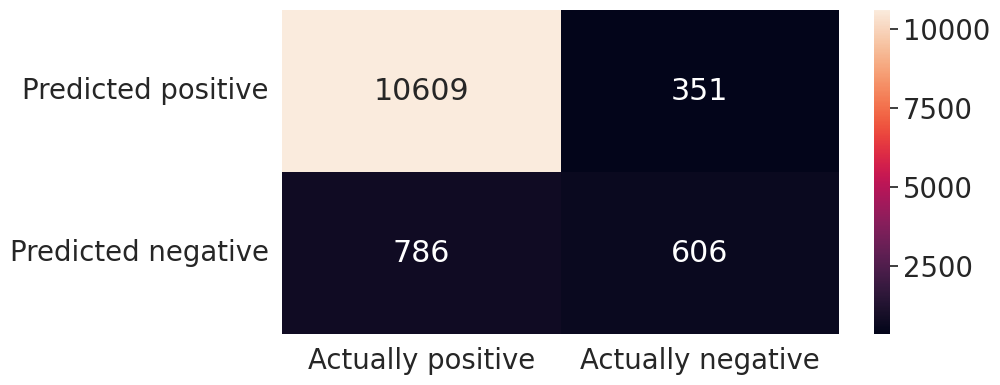

In [53]:
from sklearn.neural_network import MLPClassifier #Importing the Multi Layer Percepton Model
Neural_MLP= MLPClassifier(hidden_layer_sizes=(13,23,33),max_iter=2500,learning_rate_init=0.001,momentum=0.01,solver='adam')
Neural_MLP.fit(X_train,Y_train) #Fitting the Model
print_score(Neural_MLP, X_train, Y_train, X_test, Y_test, train=True)
print_score(Neural_MLP, X_train, Y_train, X_test, Y_test, train=False)
train_predict = Neural_MLP.predict(X_train)
test_predict = Neural_MLP.predict(X_test)
train_proba=Neural_MLP.predict_proba(X_train)
test_proba=Neural_MLP.predict_proba(X_test)
plot_auc(Neural_MLP,train_proba,train_predict,test_proba,test_predict)

In [54]:
results =pd.DataFrame({"Test Accuracy" : test_accuracy , "Train Accuracy" : train_accuracy} , index = models)
results

Test Accuracy  Train Accuracy
Logistic Regression          90.803109       90.801527
SVM without kernel           90.228303       90.100625
SVM with linear kernel       89.847798       89.694656
SVM with sigmoid kernel      86.309909       86.082582
KNN                          89.774935       99.913255
Decision Tree                88.163860       99.913255
Neural Perceptron            90.795013       92.009022

**Comparaison des modèles en utilisant la courbe ROC**

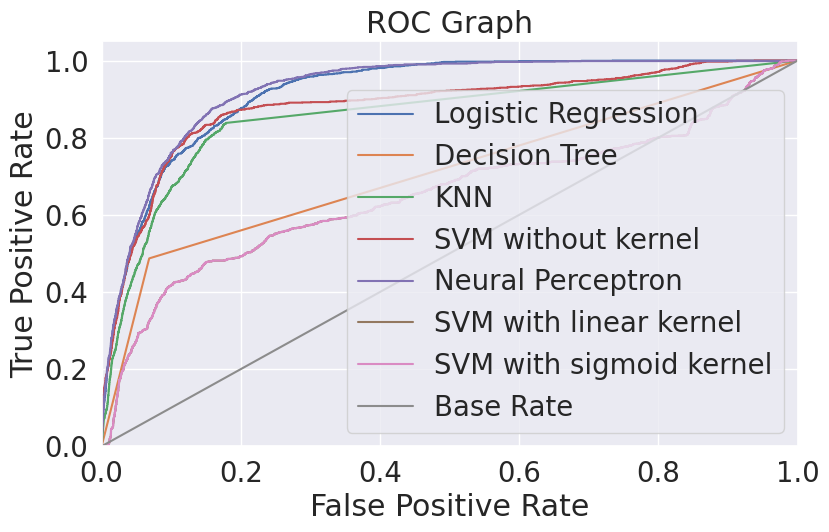

In [55]:
lr_fpr, lr_tpr, thresholds = roc_curve(Y_test, log_reg.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, thresholds = roc_curve(Y_test, dec.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(Y_test, knn.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, thresholds = roc_curve(Y_test, SVM.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, thresholds = roc_curve(Y_test, Neural_MLP.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(Y_test, SVM_k.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(Y_test, SVM_kk.predict_proba(X_test)[:,1])

plt.figure(figsize = (8,5))
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression' )
plt.plot(dt_fpr, dt_tpr,label = 'Decision Tree')
plt.plot(rf_fpr, rf_tpr, label = 'KNN' )
plt.plot(svm_fpr, svm_tpr, label = 'SVM without kernel')
plt.plot(gbc_fpr, gbc_tpr, label = 'Neural Perceptron')
plt.plot(xgb_fpr, xgb_tpr, label = 'SVM with linear kernel')
plt.plot(xgb_fpr, xgb_tpr, label = 'SVM with sigmoid kernel')
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

**Calculs des best hyper-paramètres pour chaque modèle**

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import time
n_jobs = -1


# LogisticRegression
pipe_lr = Pipeline([('lr', LogisticRegression(random_state=random_state, n_jobs=n_jobs, max_iter=500))])
# RandomForestClassifier
pipe_rf = Pipeline([('rf', RandomForestClassifier(random_state=random_state, oob_score=True, n_jobs=n_jobs))])
# KNeighborsClassifier
pipe_knn = Pipeline([('knn', KNeighborsClassifier(n_jobs=n_jobs))])
# DecisionTreeClassifier
pipe_dt = Pipeline([('dt', DecisionTreeClassifier(random_state=random_state, max_features='auto'))])
# SVM
pipe_svm = Pipeline([('svm', SVC(probability=True))])
# XGB
pipe_xgb = Pipeline([('xgb', XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42))])

cv = StratifiedKFold(shuffle=True, n_splits=5, random_state=random_state)
# set for LogisticRegression
grid_params_lr = [{
                'lr__penalty': ['l2','l1'],
                'lr__solver': ['sag','lbfgs']
                }]
# set for RandomForestClassifier
grid_params_rf = [{
                'rf__criterion': ['entropy','gini'],
                'rf__min_samples_leaf': [70,75,80],
                'rf__max_depth': [20,21,23,25],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [58,60]
                }]
# set for KNeighborsClassifier
grid_params_knn = [{'knn__n_neighbors': [16,18,19]}]
# set for SVM
grid_params_svm = [{'svm__kernel':[ 'poly', 'sigmoid']}]

# set for DecisionTreeClassifier
grid_params_dt = [{'dt__max_depth': [1,2,3,4,5,6,7,8],'dt__min_samples_leaf': [1, 3] }]
grid_params_xgb= [{
    'xgb__max_depth': range (2, 4, 1),
    #'xgb__n_estimators': range(60, 220, 40),
    #'xgb__learning_rate': [0.1, 0.01, 0.05]
}]
gs_lr = GridSearchCV(pipe_lr, param_grid=grid_params_lr,
                     scoring='accuracy', cv=cv) 
gs_svm = GridSearchCV(pipe_svm, param_grid=grid_params_svm,
                     scoring='accuracy', cv=cv) 
# for RandomForestClassifier
gs_rf = GridSearchCV(pipe_rf, param_grid=grid_params_rf,
                     scoring='accuracy', cv=cv)
# for KNeighborsClassifier
gs_knn = GridSearchCV(pipe_knn, param_grid=grid_params_knn,
                     scoring='accuracy', cv=cv)
# for DecisionTreeClassifier
gs_dt = GridSearchCV(pipe_dt, param_grid=grid_params_dt,
                     scoring='accuracy', cv=cv)
gs_svm= GridSearchCV(pipe_svm, param_grid=grid_params_svm,scoring='accuracy', cv=cv)
gs_xgb= GridSearchCV(pipe_xgb, param_grid=grid_params_xgb,scoring='accuracy', cv=cv)
look_for = [gs_lr, gs_rf, gs_knn, gs_dt,gs_xgb,gs_svm]
# dict for later use 
model_dict = {0:'Logistic_reg', 1:'RandomForest', 2:'Knn', 3:'DesionTree',4:'XGBClassifier',5:'SVM'}
result_acc = {}
result_auc = {}
models = []
best_params=[]
for index, model in enumerate(look_for):
        start = time.time()
        print()
        print('+++++++ Start New Model ++++++++++++++++++++++')
        print('Estimator is {}'.format(model_dict[index]))
        model.fit(X_train, Y_train)
        print('---------------------------------------------')
        best_params.append(model.best_params_)
        print('best params {}'.format(model.best_params_))
        print('best score is {}'.format(model.best_score_))
        auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])
        print('---------------------------------------------')
        print('ROC_AUC is {} and accuracy rate is {}'.format(auc, model.score(X_test, Y_test)))
        end = time.time()
        print('It lasted for {} sec'.format(round(end - start, 3)))
        print('++++++++ End Model +++++++++++++++++++++++++++')
        print()
        print()
        models.append(model.best_estimator_)
        result_acc[index] = model.best_score_
        result_auc[index] = auc


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic_reg
---------------------------------------------
best params {'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
best score is 0.9078417765440667
---------------------------------------------
ROC_AUC is 0.9191984698800236 and accuracy rate is 0.9075453367875648
It lasted for 60.388 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 20, 'rf__min_samples_leaf': 70, 'rf__min_samples_split': 3, 'rf__n_estimators': 60}
best score is 0.9000346981263012
---------------------------------------------
ROC_AUC is 0.9312652395859551 and accuracy rate is 0.9026878238341969
It lasted for 568.273 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is Knn
---------------------------------------------
bes

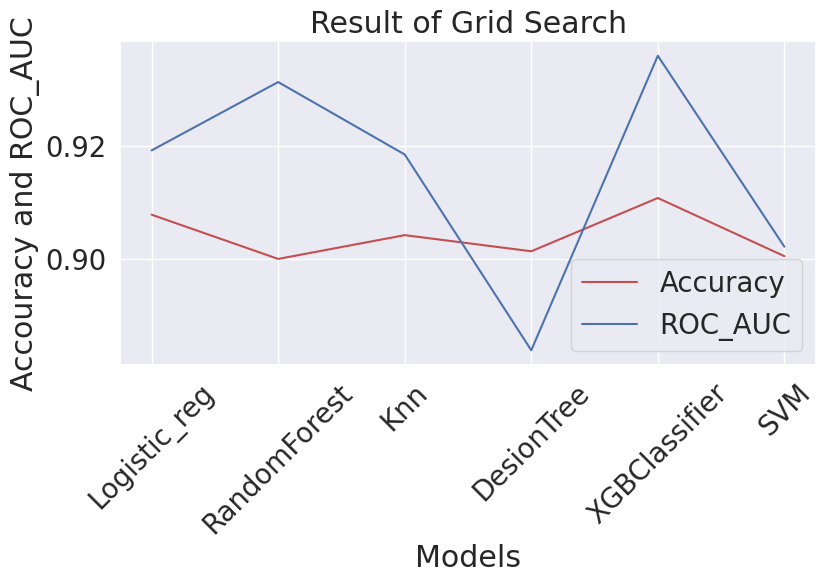

In [57]:
plt.plot(model_dict.values(), result_acc.values(), c='r')
plt.plot(model_dict.values(), result_auc.values(), c='b')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.ylabel('Accouracy and ROC_AUC')
plt.title('Result of Grid Search')
plt.legend(['Accuracy', 'ROC_AUC'])
plt.show();

**Comparaison les résultats des modeles en fonction de  l'AUC avec la technique de grid search**

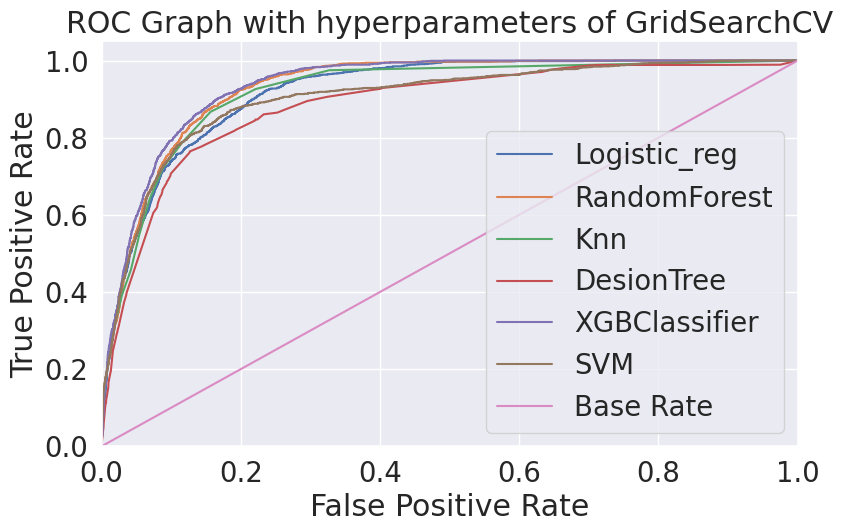

In [58]:
plt.figure(figsize = (8,5))
for index, model in enumerate(look_for):
      lr_fpr, lr_tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
      plt.plot(lr_fpr, lr_tpr, label = model_dict[index])
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph with hyperparameters of GridSearchCV')
plt.legend(loc="lower right")
plt.show()

In [59]:
pd.DataFrame(list(zip(model_dict.values(), result_acc.values(), result_auc.values())),columns=['Model', 'Accuracy_rate','Roc_auc_rate'])

Model  Accuracy_rate  Roc_auc_rate
0   Logistic_reg       0.907842      0.919198
1   RandomForest       0.900035      0.931265
2            Knn       0.904233      0.918470
3     DesionTree       0.901388      0.883906
4  XGBClassifier       0.910791      0.935912
5            SVM       0.900520      0.902198

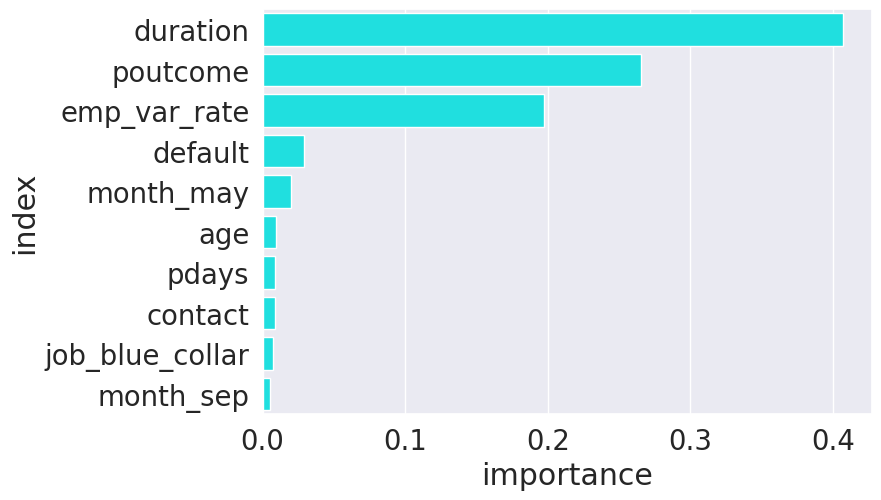

In [60]:
feature_importances = pd.DataFrame(models[3].named_steps['dt'].feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()[:10]
f, ax = plt.subplots(figsize=(7,5))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color='cyan');

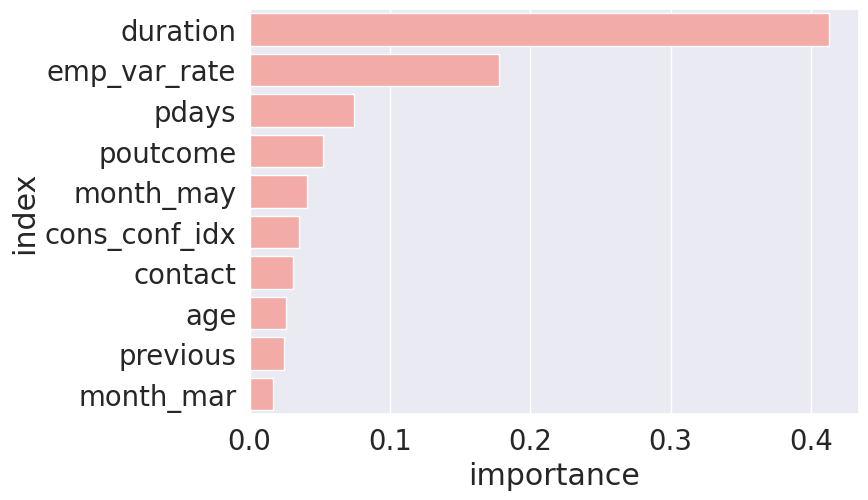

In [61]:
feature_importances = pd.DataFrame(models[1].named_steps['rf'].feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()[:10]
f, ax = plt.subplots(figsize=(7,5))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color='r');

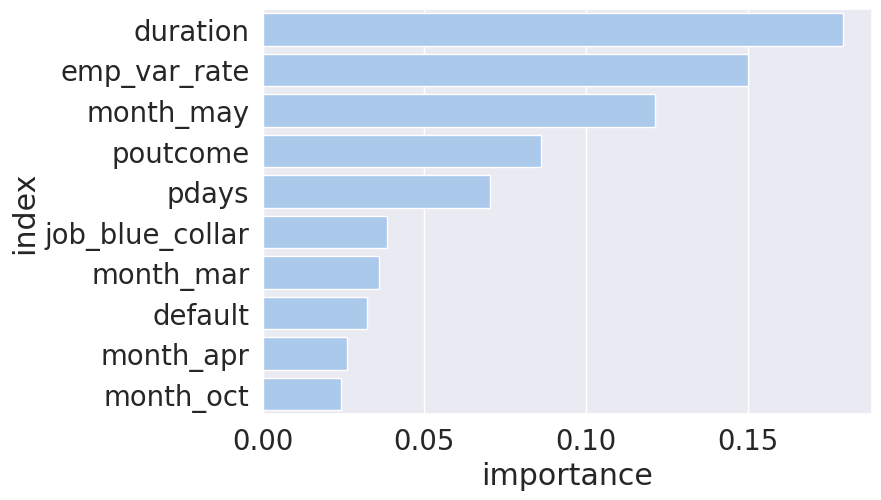

In [62]:
feature_importances = pd.DataFrame(models[4].named_steps['xgb'].feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()[:10]
f, ax = plt.subplots(figsize=(7,5))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color='b');

**Préparation des fonctions suivants:**


*   Trouver les best hyper-paramètres
*   le rééquilibrage de classes (under,over)
*   Plot les résultats des modèles 



In [80]:

def tunning_hyperparameters(model,params,x_train,y_train):
     
     d=dict()
     for k,v in params.items():
         s=k.split('__')[1]
         d[s]=[v]
     gs= GridSearchCV(model, param_grid=d,scoring='accuracy', cv=3)
     gs.fit(X_train, Y_train)
     print("Les meilleurs hyperparamétres sont :")
     print(gs.best_params_)
     return gs.best_params_
     

def basic_classifier(model,params, df_x,df_y):
    if model==SVC :
                 model= model(**params,probability=True)
    else:
                 model= model(**params)
    kfold = KFold(n_splits =3)
    x = df_x
    y = df_y
    y = np.array([y]).T
    # Generating cross validated scores
    scores = cross_validate(model,x,y,cv = kfold,scoring = ['accuracy','f1','precision','recall'],return_estimator=True)
    accuracy = round(np.average(scores['test_accuracy'])*100,2)
    precision = round(np.average(scores['test_precision'])*100,2)
    recall = round(np.average(scores['test_recall'])*100,2)
    f1_Score = round(np.average(scores['test_f1'])*100,2)
    data = [[accuracy,precision,recall,f1_Score]]
    print (tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))
    ms=scores['estimator']
    model=ms[-1]
    return accuracy,precision,recall,f1_Score ,model




def plot_data(models,x_test,y_test):
     plt.figure(figsize = (15,6))
     plt.plot([0,1], [0,1],label='Base Rate')
     for elem in models:
          nom_model=elem['Modèle']
          model=elem['model']
          lr_fpr, lr_tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
          plt.plot(lr_fpr, lr_tpr, label = nom_model )
      
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')
     plt.title('ROC Graph')
     plt.legend(loc="lower right")
     plt.show()

In [81]:
l=[]
ll=[]
l_unbalanced=[]
l_oversampled=[]
l_downsampled=[]
df_x=X_train
df_y=Y_train
sm = SMOTE(random_state = 12)
x_train_sm, y_train_sm = sm.fit_resample(X_train, np.ravel(Y_train, order = 'C'))

y_train= np.array([Y_train]).T
# Combining both the dataframes
combo = np.concatenate((X_train,y_train),axis = 1)
df = pd.DataFrame(data=combo)
# Separating the dataframe on based of the output labels
df_majority = df[df.iloc[:,-1] == 0]
df_minority = df[df.iloc[:,-1] == 1]
# Downsampling the majority class down to minority class
df_majority_downsampled = resample(df_majority,replace = False,n_samples = len(df_minority), random_state = 123)
# Recombining the modified classes
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
x_train = df_downsampled.iloc[:,:-1].values
y_train = df_downsampled.iloc[:,-1].values

**Etude des modèles avec la tachnique de grid search et pour chaque approches (undersampling et oversampling)**

Logistic Regression avec les classes déséquilibrées

In [82]:
params=tunning_hyperparameters(LogisticRegression(),best_params[0],df_x,df_y)
a,b,c,dd,model =basic_classifier(LogisticRegression,params,df_x,df_y)
d=dict()
r=dict()
d['Modèle']='Logistic Regression for unbalanced  data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['Modèle']='Logistic Regression for unbalanced  data'
r['model']=model
l.append(d)
ll.append(r)
l_unbalanced.append(r)

Les meilleurs hyperparamétres sont :
{'penalty': 'l2', 'solver': 'lbfgs'}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     90.78        65.45     38.59       48.54


Logistic Regression avec l'approche de over-sampling

In [83]:
params=tunning_hyperparameters(LogisticRegression(),best_params[0],x_train_sm,y_train_sm)
a,b,c,dd,model =basic_classifier(LogisticRegression,params,x_train_sm,y_train_sm)
d=dict()
r=dict()
d['Modèle']='Logistic Regression for oversampled data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['Modèle']='Logistic Regression for oversampled  data'
r['model']=model
l.append(d)
ll.append(r)
l_oversampled.append(r)

Les meilleurs hyperparamétres sont :
{'penalty': 'l2', 'solver': 'lbfgs'}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     85.22        73.75     83.99       76.18


Logistic Regression avec l'approche de under-sampling

In [84]:
params=tunning_hyperparameters(LogisticRegression(),best_params[0],x_train,y_train)
a,b,c,dd,model =basic_classifier(LogisticRegression,params,x_train,y_train)
d=dict()
r=dict()
d['Modèle']='Logistic Regression for downsampled data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['Modèle']='Logistic Regression for downsampled  data'
r['model']=model
l.append(d)
ll.append(r)
l_downsampled.append(r)

Les meilleurs hyperparamétres sont :
{'penalty': 'l2', 'solver': 'lbfgs'}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     75.67        61.33     52.02       55.84


arbre de décision avec des classes déséquilibrées

In [85]:
params=tunning_hyperparameters(DecisionTreeClassifier(),best_params[3],df_x,df_y)
a,b,c,dd,model=basic_classifier(DecisionTreeClassifier,params,df_x,df_y)
d=dict()
r=dict()
d['Modèle']='Decision tree for unbalanced data'
r['Modèle']='Decision tree for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_unbalanced.append(r)

Les meilleurs hyperparamétres sont :
{'max_depth': 8, 'min_samples_leaf': 3}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     90.17        58.22      45.3       50.94


Arbre de décision avec l'approche de over-sampling

In [86]:
params=tunning_hyperparameters(DecisionTreeClassifier(),best_params[3],x_train_sm,y_train_sm)
a,b,c,dd,model=basic_classifier(DecisionTreeClassifier,params,x_train_sm,y_train_sm)
d=dict()
r=dict()
d['Modèle']='Decision tree for oversampled data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['Modèle']='Decision tree for oversampled data'
r['model']=model
l.append(d)
ll.append(r)
l_oversampled.append(r)

Les meilleurs hyperparamétres sont :
{'max_depth': 8, 'min_samples_leaf': 3}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     84.46         71.5     88.76       76.16


Arbre de décision avec l'approche de under-sampling

In [87]:
params=tunning_hyperparameters(DecisionTreeClassifier(),best_params[3],x_train,y_train)
a,b,c,dd,model=basic_classifier(DecisionTreeClassifier,params,x_train,y_train)
d=dict()
r=dict()
d['Modèle']='Decision tree for downsampled data'
r['Modèle']='Decision tree for downsampled data'
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
r['model']=model
l.append(d)
ll.append(r)
l_downsampled.append(r)

Les meilleurs hyperparamétres sont :
{'max_depth': 8, 'min_samples_leaf': 3}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     76.35         61.3     53.62       56.63


Random Forest avec les classes déséquilibrées

In [88]:
params=tunning_hyperparameters(RandomForestClassifier(),best_params[1],df_x,df_y)
a,b,c,dd,model= basic_classifier(RandomForestClassifier,params,df_x,df_y)
d=dict()
r=dict()
d['Modèle']='Random Forest for unbalanced data'
r['Modèle']='Random Forest for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_unbalanced.append(r)

Les meilleurs hyperparamétres sont :
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 70, 'min_samples_split': 3, 'n_estimators': 60}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     89.95        75.44     16.23       26.67


Random Forest avec l'approche de over-sampling

In [89]:
params=tunning_hyperparameters(RandomForestClassifier(),best_params[1],x_train_sm,y_train_sm)
a,b,c,dd,model= basic_classifier(RandomForestClassifier,params,x_train_sm,y_train_sm)
d=dict()
r=dict()
d['Modèle']='Random Forest for oversampled data'
r['Modèle']='Random Forest for oversampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_oversampled.append(r)

Les meilleurs hyperparamétres sont :
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 70, 'min_samples_split': 3, 'n_estimators': 60}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     79.12        68.98     89.45       72.46


Random Forest avec l'approche de under-sampling

In [90]:
params=tunning_hyperparameters(RandomForestClassifier(),best_params[1],x_train,y_train)
a,b,c,dd,model= basic_classifier(RandomForestClassifier,params,x_train,y_train)
d=dict()
r=dict()
d['Modèle']='Random Forest for downsampled data'
r['Modèle']='Random Forest for downsampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_downsampled.append(r)

Les meilleurs hyperparamétres sont :
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 70, 'min_samples_split': 3, 'n_estimators': 60}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     59.67        60.48     42.92       46.55


XGBoost avec les classes déséquilinrées

In [91]:
params=tunning_hyperparameters(XGBClassifier(),best_params[4],df_x,df_y)
a,b,c,dd,model=basic_classifier(XGBClassifier, params, df_x, df_y)
d=dict()
r=dict()
d['Modèle']='XGBClassifier for unbalanced data'
r['Modèle']='XGBClassifier for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_unbalanced.append(r)

Les meilleurs hyperparamétres sont :
{'max_depth': 3}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     90.74        62.22     45.72       52.66


XGboost avec l'approche de over-sampling

In [92]:
params=tunning_hyperparameters(XGBClassifier(),best_params[4],x_train_sm,y_train_sm)
a,b,c,dd,model=basic_classifier(XGBClassifier, params, x_train_sm,y_train_sm)
d=dict()
r=dict()
d['Modèle']='XGBClassifier for oversampled data'
r['Modèle']='XGBClassifier for oversampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_oversampled.append(r)

Les meilleurs hyperparamétres sont :
{'max_depth': 3}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     90.96        78.01     88.16       81.65


XGBoost avec l'approche de under-sampling

In [93]:
params=tunning_hyperparameters(XGBClassifier(),best_params[4],x_train,y_train)
a,b,c,dd,model=basic_classifier(XGBClassifier, params, x_train,y_train)
d=dict()
r=dict()
d['Modèle']='XGBClassifier for downsampled data'
r['Modèle']='XGBClassifier for downsampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_downsampled.append(r)

Les meilleurs hyperparamétres sont :
{'max_depth': 3}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      78.7        61.73     55.23       57.97


In [94]:
params=tunning_hyperparameters(SVC(),best_params[5],df_x,df_y)
a,b,c,dd,model= basic_classifier(SVC,params,df_x,df_y)
d=dict()
r=dict()
d['Modèle']='SVM for unbalanced data'
r['Modèle']='SVM for unbalanced data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d)
ll.append(r)
l_unbalanced.append(r)

Les meilleurs hyperparamétres sont :
{'kernel': 'poly'}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     90.07        71.58     19.67       30.85


In [95]:
params=tunning_hyperparameters(SVC(),best_params[5],x_train_sm,y_train_sm)
a,b,c,dd,model= basic_classifier(SVC,params,x_train_sm,y_train_sm)
d=dict()
r=dict()
d['Modèle']='SVM for oversampled data'
r['Modèle']='SVM for oversampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d) 
ll.append(r)
l_oversampled.append(r)

Les meilleurs hyperparamétres sont :
{'kernel': 'poly'}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     84.37           72     89.58       76.21


In [96]:
params=tunning_hyperparameters(SVC(),best_params[5],x_train,y_train)
a,b,c,dd,model= basic_classifier(SVC,params,x_train,y_train)
d=dict()
r=dict()
d['Modèle']='SVM for downsampled data'
r['Modèle']='SVM for downsampled data'
r['model']=model
d['Accuracy']=str(a)
d['Precision']=str(b)
d['Recall']=str(c)
d['F1_score']=str(dd)
l.append(d) 
ll.append(r)
l_downsampled.append(r)

Les meilleurs hyperparamétres sont :
{'kernel': 'poly'}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     74.31        61.36     53.18       56.54


**Comparaison de tous les modèles avec des classes déséquilibrées et apres le sampling (over et under) en fonction des métriques d'évaluation**

In [97]:
res=pd.DataFrame(l,columns=['Modèle','Accuracy','Precision','Recall','F1_score'])
res=res.set_index('Modèle')
res

Accuracy Precision Recall F1_score
Modèle                                                                     
Logistic Regression for unbalanced  data    90.78     65.45  38.59    48.54
Logistic Regression for oversampled data    85.22     73.75  83.99    76.18
Logistic Regression for downsampled data    75.67     61.33  52.02    55.84
Decision tree for unbalanced data           90.17     58.22   45.3    50.94
Decision tree for oversampled data          84.46      71.5  88.76    76.16
Decision tree for downsampled data          76.35      61.3  53.62    56.63
Random Forest for unbalanced data           89.95     75.44  16.23    26.67
Random Forest for oversampled data          79.12     68.98  89.45    72.46
Random Forest for downsampled data          59.67     60.48  42.92    46.55
XGBClassifier for unbalanced data           90.74     62.22  45.72    52.66
XGBClassifier for oversampled data          90.96     78.01  88.16    81.65
XGBClassifier for downsampled data           78.7     61.73  55.23    57.97
SVM for unbalanced data                     90.07     71.58  19.67    30.85
SVM for oversampled data                    84.37      72.0  89.58    76.21
SVM for downsampled data                    74.31     61.36  53.18    56.54

**Préparation des fonctions pour plotter les résultats des modèles en fonction de leurs métriques**

In [98]:
acc=res
acc=acc.astype(float)
def plot_metrics(acc):
    sns.set_style(style='white')
    ax = acc.plot(kind='bar', figsize=(20,5), width=0.4, color=['#42b3d5', '#e85285','#00FF00','#FFBF00'], fontsize=18)

    ax.legend(loc='best')
    plt.xticks(rotation=0, ha="center")

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(False)
    ax.spines['left'].set_linewidth(False)

    ax.yaxis.grid()
    ax.get_yaxis().set_visible(False)

    for n in range(2):
        for index, val in enumerate(acc.iloc[:,n].transpose()): 
            label=str(val) + '%'
            
            if n==0:
                ax.annotate(label, xy=(index-0.15, val-5), color='#ffffff', fontsize=14, fontweight='bold')
            elif n==1:
                ax.annotate(label, xy=(index+0.05, val-5), color='#ffffff', fontsize=14, fontweight='bold')

    plt.show()

Arbre de décision

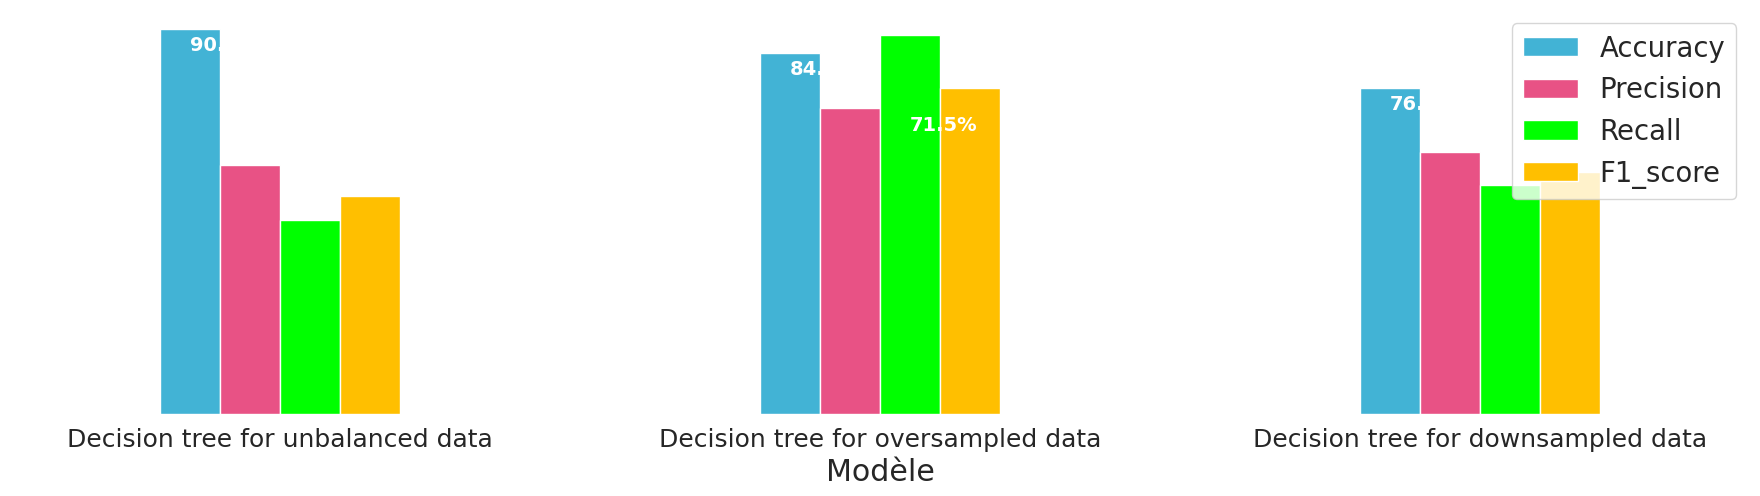

In [99]:
plot_metrics(acc[3:6])

Random Forest

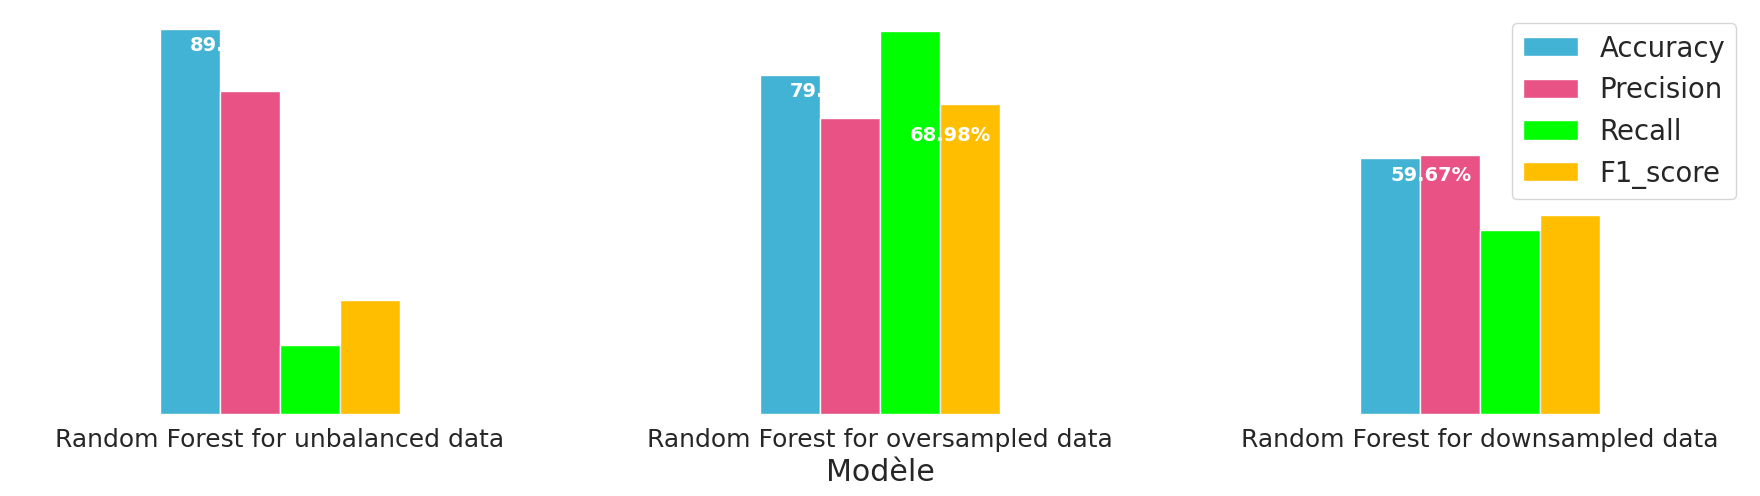

In [100]:
plot_metrics(acc[6:9])

XG Boost

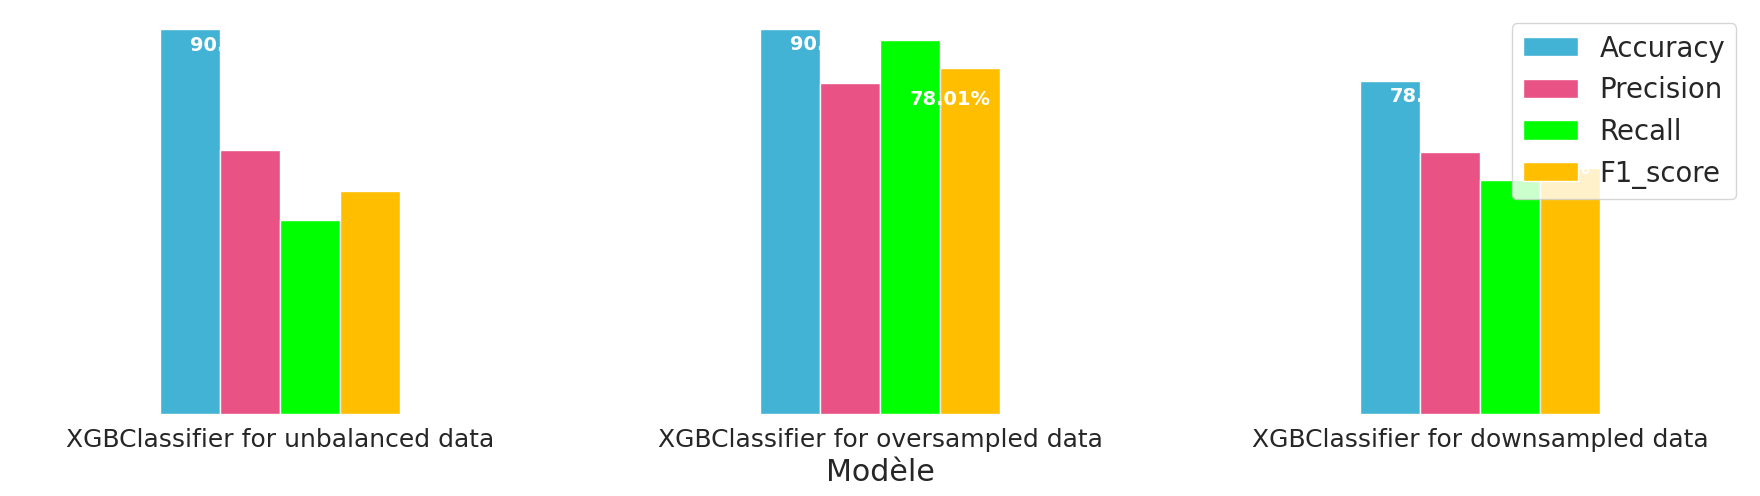

In [101]:
plot_metrics(acc[9:12])

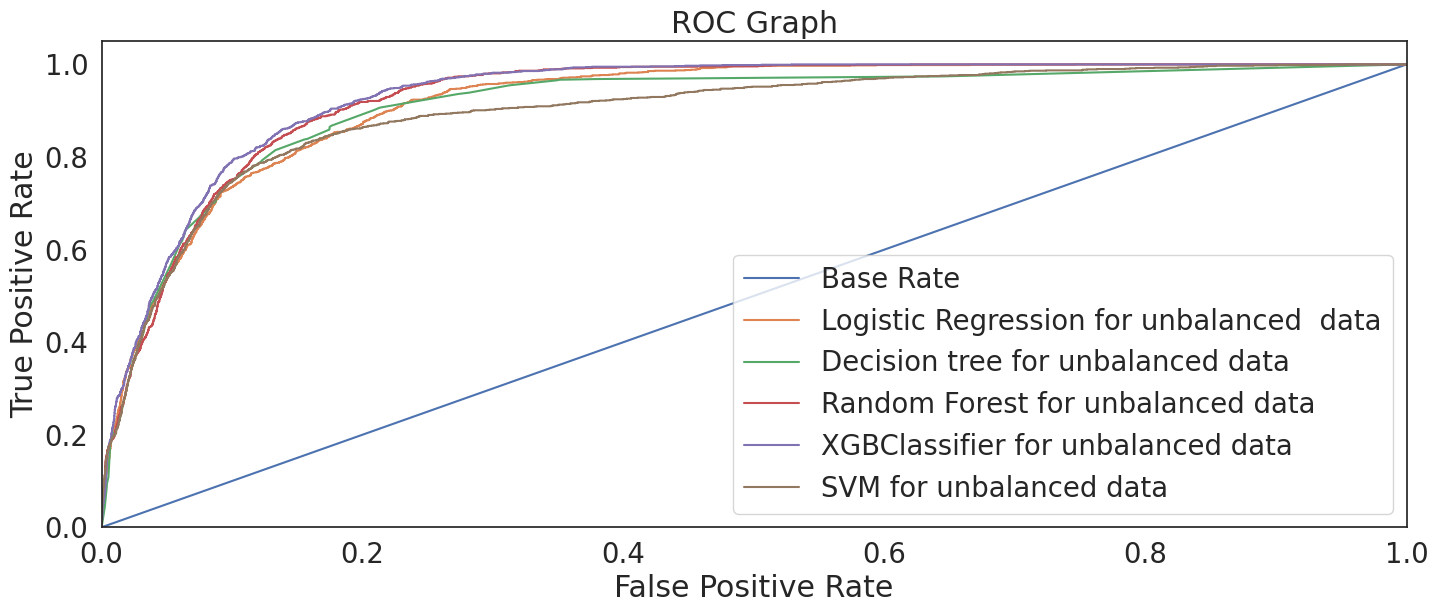

In [102]:
plot_data(l_unbalanced,X_test,Y_test)

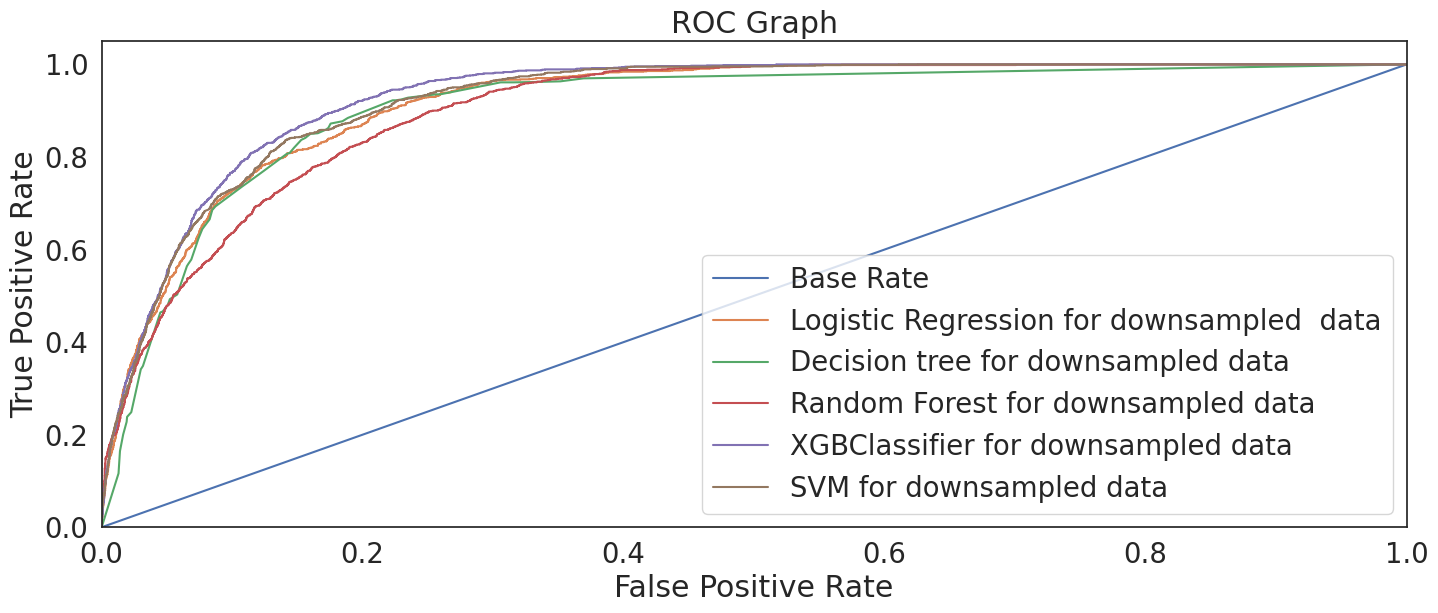

In [103]:
plot_data(l_downsampled,X_test,Y_test)

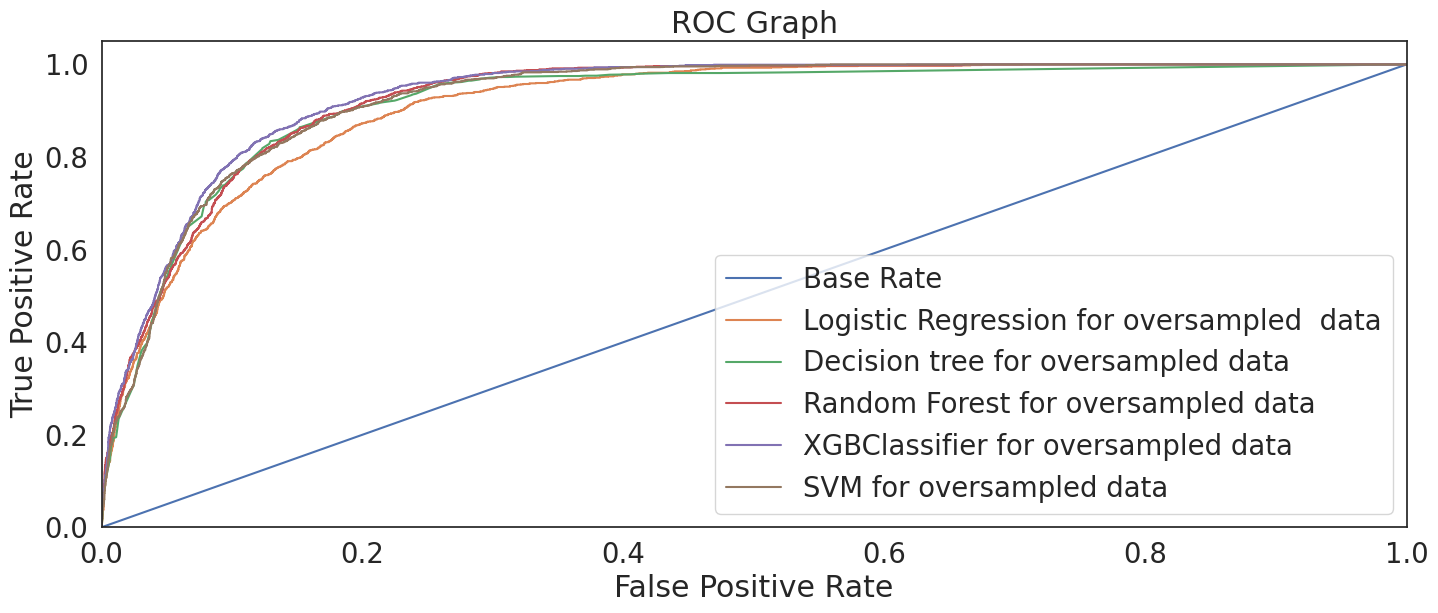

In [104]:
plot_data(l_oversampled,X_test,Y_test)

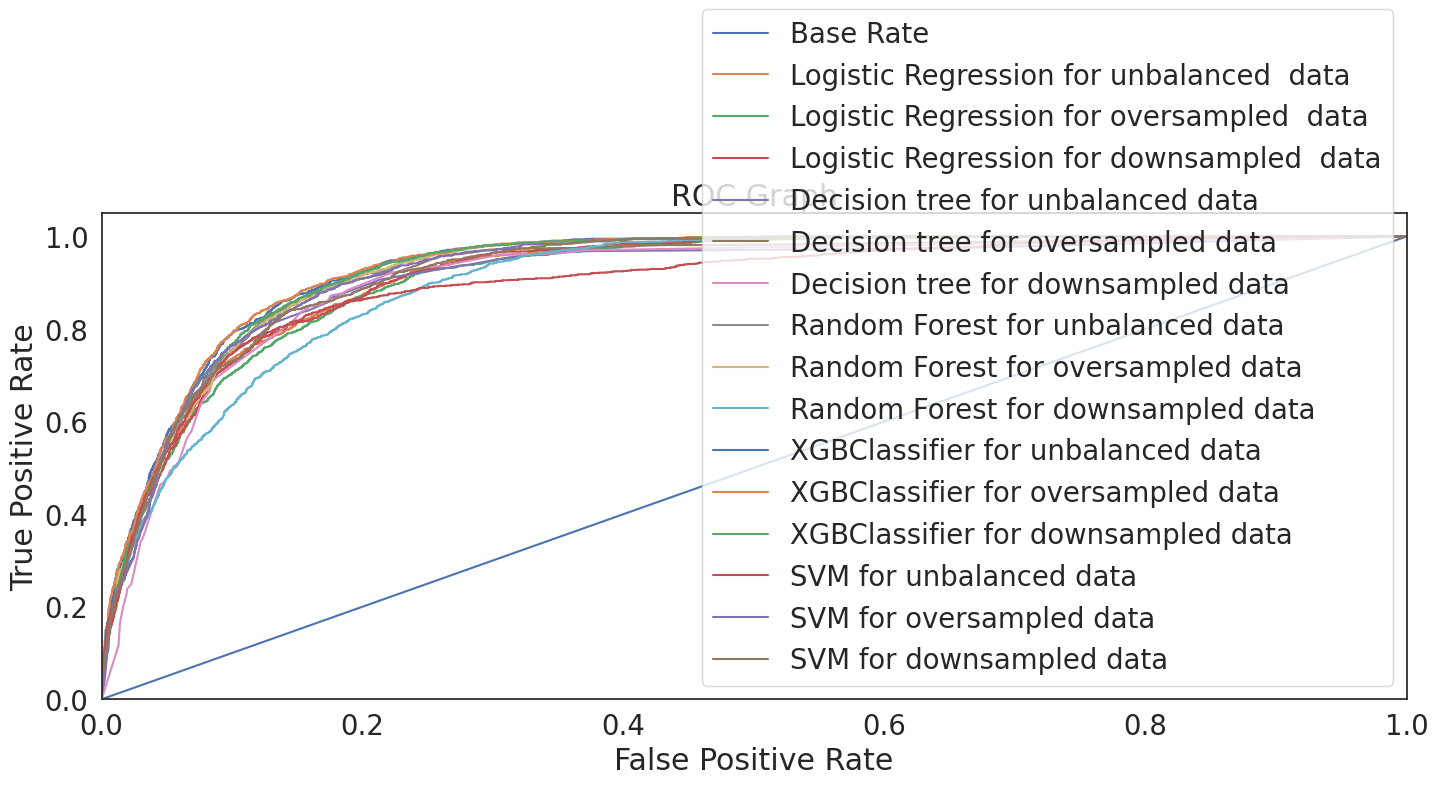

In [105]:
plot_data(ll,X_test,Y_test)

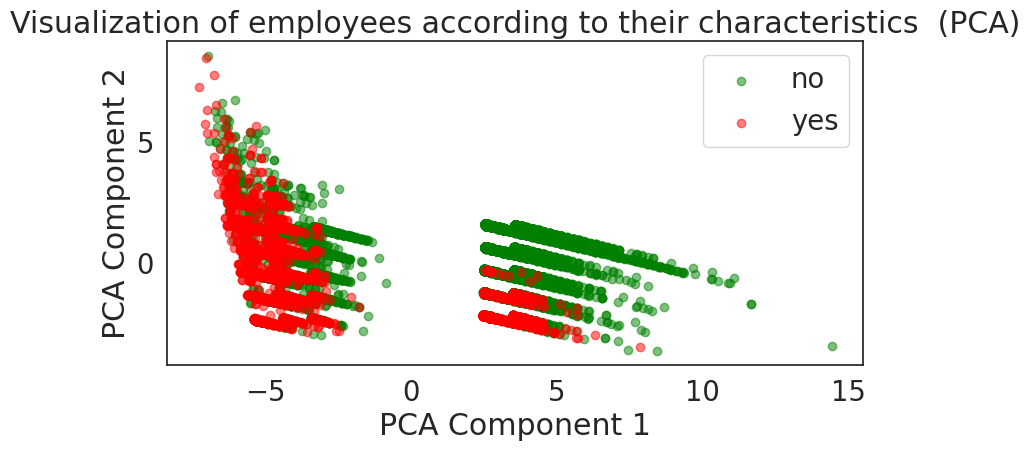

In [133]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
respca = pca.fit_transform(numeric_dataset)
respcadf = pd.DataFrame(respca, index=numeric_dataset.index)
plt.scatter(respcadf[data["y"]==0].iloc[:,0], respcadf[data["y"]==0].iloc[:,3], c="green",alpha=0.5, label="no")
plt.scatter(respcadf[data["y"]==1].iloc[:,0], respcadf[data["y"]==1].iloc[:,3], c="red",alpha=0.5, label="yes")

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualization of employees according to their characteristics  (PCA)")
plt.legend()
plt.show()

Variances (Percentage):
[52.54094351 25.09912318  6.12485293  5.00476055]

Top 4 most important features in each component
Component 0: ['emp_var_rate', 'campaign', 'pdays', 'contact']
Component 1: ['campaign', 'emp_var_rate', 'duration', 'contact']
Component 2: ['pdays', 'duration', 'poutcome', 'emp_var_rate']
Component 3: ['duration', 'pdays', 'campaign', 'previous']


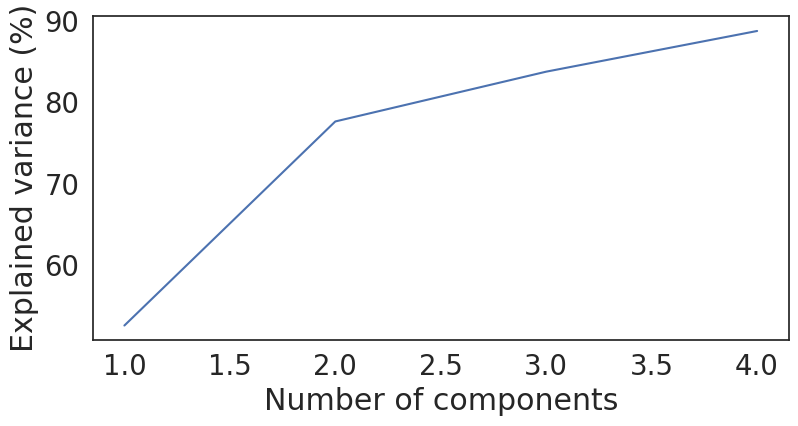

In [134]:
pd.DataFrame({"Noms des variables" : numeric_dataset.columns, "Composante 1" : pca.components_[0], "Composante 2" : pca.components_[1],"Composante 3" : pca.components_[2],"Composante 4" : pca.components_[3]})
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()
# plot a scree plot
components = len(pca.explained_variance_ratio_)
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
pca_components = abs(pca.components_)
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {numeric_dataset.columns[indices].to_list()}')

In [135]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(respcadf, y, test_size=0.3, random_state=random_state,stratify=y)

In [136]:
def tunning_hyperparameter(model,params,x_train,y_train):
     print(params)
     d=dict()
     for k,v in (params[0]).items():
         s=k.split('__')[1]
         d[s]=v
     gs= GridSearchCV(model, param_grid=d,scoring='accuracy', cv=3)
     gs.fit(X_train, Y_train)
     print("Les meilleurs hyperparamétres sont :")
     print(gs.best_params_)
     return gs.best_params_

# PCA + Decision Tree for unbalanced data

In [137]:
params=tunning_hyperparameter(DecisionTreeClassifier(),grid_params_dt,x_train_pca,y_train_pca)
a,b,c,dd,model=basic_classifier(DecisionTreeClassifier,params,x_train_pca,y_train_pca)

[{'dt__max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'dt__min_samples_leaf': [1, 3]}]
Les meilleurs hyperparamétres sont :
{'max_depth': 6, 'min_samples_leaf': 1}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     90.19        59.57     41.49       48.47


# PCA +Random Forest for unbalanced data

In [123]:
params=tunning_hyperparameter(RandomForestClassifier(),grid_params_rf,x_train_pca,y_train_pca)
a,b,c,dd,model= basic_classifier(RandomForestClassifier,params,x_train_pca,y_train_pca)

[{'rf__criterion': ['entropy', 'gini'], 'rf__min_samples_leaf': [70, 75, 80], 'rf__max_depth': [20, 21, 23, 25], 'rf__min_samples_split': [3, 5], 'rf__n_estimators': [58, 60]}]
Les meilleurs hyperparamétres sont :
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 70, 'min_samples_split': 3, 'n_estimators': 58}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     90.16        61.14     35.01       44.47


# PCA +Logistic Regression for unbalanced data

In [138]:
params=tunning_hyperparameter(LogisticRegression(),grid_params_lr,x_train_pca,y_train_pca)
a,b,c,dd,model =basic_classifier(LogisticRegression,params,x_train_pca,y_train_pca)

[{'lr__penalty': ['l2', 'l1'], 'lr__solver': ['sag', 'lbfgs']}]
Les meilleurs hyperparamétres sont :
{'penalty': 'l2', 'solver': 'lbfgs'}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      89.9        62.43     25.91       36.61


# Resampling of data

In [139]:
sm = SMOTE(random_state = 12)
x_train_sm_pca, y_train_sm_pca = sm.fit_resample(x_train_pca, np.ravel(y_train_pca, order = 'C'))

# PCA + Logistic Regression for balanced data

In [140]:
params=tunning_hyperparameter(LogisticRegression(),grid_params_lr,x_train_sm_pca,y_train_sm_pca)
a,b,c,dd,model =basic_classifier(LogisticRegression,params,x_train_sm_pca,y_train_sm_pca)

[{'lr__penalty': ['l2', 'l1'], 'lr__solver': ['sag', 'lbfgs']}]
Les meilleurs hyperparamétres sont :
{'penalty': 'l2', 'solver': 'lbfgs'}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     69.16        66.39     78.39       63.68


# PCA + Decision tree for balanced data

In [141]:
params=tunning_hyperparameter(DecisionTreeClassifier(),grid_params_dt,x_train_sm_pca,y_train_sm_pca)
a,b,c,dd,model=basic_classifier(DecisionTreeClassifier,params,x_train_sm_pca,y_train_sm_pca)

[{'dt__max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'dt__min_samples_leaf': [1, 3]}]
Les meilleurs hyperparamétres sont :
{'max_depth': 6, 'min_samples_leaf': 1}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     77.11        66.84     89.21       70.64


# PCA + Random Forest for unbalanced data

In [142]:
params=tunning_hyperparameter(RandomForestClassifier(),grid_params_rf,x_train_sm_pca,y_train_sm_pca)
a,b,c,dd,model= basic_classifier(RandomForestClassifier,params,x_train_sm_pca,y_train_sm_pca)

[{'rf__criterion': ['entropy', 'gini'], 'rf__min_samples_leaf': [70, 75, 80], 'rf__max_depth': [20, 21, 23, 25], 'rf__min_samples_split': [3, 5], 'rf__n_estimators': [58, 60]}]
Les meilleurs hyperparamétres sont :
{'criterion': 'entropy', 'max_depth': 21, 'min_samples_leaf': 80, 'min_samples_split': 5, 'n_estimators': 60}
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      79.4        68.92     88.84       72.42
